# Grupo Dale Science
**Composto por:**
- Luã Greski Diel
- Rodrigo Aschidamini João
- Lorenzo Menezes Silveira
- Chrinovic Tshibambe Ngala
- Igor Morais Telles

## Sobre o Projeto

Este notebook está em desenvolvimento no **bootcamp em data science da BAH**, em parceria com a empresa **FINOR**. A tarefa envolve a criação de um modelo de **index tracking**, que busca reproduzir o comportamento de índices de ações com um número de ações inferior ao do índice original. Isso simplifica a composição do portfólio e reduz o custo de manutenção.

### Objetivo geral:
Desenvolver um modelo de index tracking para os índices **S&P100** e **IBOV**.

### Objetivo deste notebook:
Análise exploratória e visualização de dados índices **S&P100** e **IBOV** e suas respectivas composições.

## Importação de Bibliotecas

Import das bibliotecas mais gerais e básicas para a processamento e visualização dos dados.

In [1]:
import pandas as pd               # Biblioteca para a manipulação de dados - Versão 2.2.2
import yfinance as yf             # Biblioteca para fazer o download dos dados do site Yahoo Finance - Versão 0.2.44
import matplotlib.pyplot as plt   # Biblioteca para Visualização de dados - versão 3.7.1
#import matplotlib
import seaborn as sns             # Biblioteca para Visualização de dados - versão 0.13.2

# Necessário para os plots aparecerem automáticamente no Jupyter
%matplotlib inline

# instalação das versões usadas neste trabalho
#!pip install pandas==2.2.2
#!pip install yfinance==0.2.44
#!pip install matplotlib==3.7.1
#!pip install seaborn==0.13.2

# verificar as versões das bibliotecas
#pd.__version__
#yf.__version__
#matplotlib.__version__
#sns.__version__


## Coleta de dados dos índices

A partir da biblioteca `yfinance` os dados históricos dos índices **S&P 100** e **IBOV** foram baixados.

In [2]:
indice = ["^OEX", "^BVSP"] # Lista contendo os índices de interesse

# Função para realizar o download dos dados históricos para cada índice
def download_dados_indices(indice):
    return yf.download(indice, start="2017-10-18", end="2024-10-18") # data no formato AAAA-MM-DD


sp100_dados = download_dados_indices(indice[0]) # Recebe os dados históricos do índice S&P100 (cujo código é ^OEX) usando a função download_data
bvsp_dados = download_dados_indices(indice[1])  # Recebe os dados históricos do índice IBOV (cujo código é ^BVSP) usando a função download_data

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


## Coleta de dados da composição dos índices

De forma similiar aos índices, os dados foram baixados usanda a biblioteca `yfinance`. Entretanto, como é necessário ter a informação dos símbolos (tickers) dos ativos, foram usados conjuntos de dados com a composição de cada índice obtidos do site iShares. Para a composição do índice **S&P100**, os dados foram obtidos a partir do link [iShares_S&P100](https://www.ishares.com/us/products/239723/ishares-sp-100-etf). Para os dados da composição do **IBOV**: [iShares_IBOV](https://www.blackrock.com/br/products/251816/ishares-ibovespa-fundo-de-ndice-fund).

In [3]:
# Lendo o .csv contendo a composição do S&P 100 e IBOVESPA
composicao_sp100 = pd.read_csv('OEF_holdings.csv')
composicao_bvsp = pd.read_csv('BOVA11_holdings.csv')

# Salvando apenas o código (ticker) das ações que compõem os índices
codigos_sp100 = composicao_sp100['Ticker']
codigos_bvsp = composicao_bvsp['Ticker'] + ".SA" # no Yahoo Finance os ativos da IBOV possuem .SA no final

# Função para realizar o download dos dados históricos para uma lista de tickers
def download_dados_acoes(codigos, start="2017-10-18", end="2024-10-18"):
    all_data = []

    for cod in codigos:
        # Baixando os dados usando yfinance
        data = yf.download(cod, start=start, end=end)

        # Resetando o índice (data) e inserindo o código como primeira coluna
        data.reset_index(inplace=True)
        data.insert(0, 'Symbol', cod)  # Inserir a coluna com o código da ação na primeira posição

        # Adiciona os dados da ação à lista
        all_data.append(data)

    # Concatenando todos os DataFrames em um único DataFrame
    combined_data = pd.concat(all_data)

    return combined_data

# Baixa os dados históricos das ações do S&P 100
sp100_ativos_hist = download_dados_acoes(codigos_sp100)

# Baixa os dados históricos das ações do IBOVESPA
bvsp_ativos_hist = download_dados_acoes(codigos_bvsp)

composicao_bvsp = composicao_bvsp.replace(r'^\s*$', float('NaN'), regex=True).dropna(how='all')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['BRKB']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[****

### Conferindo informações dos dados dos índices

In [4]:
# Contando número de linhas e colunas
print('Quantidade de linhas e colunas S&P 100:', sp100_dados.shape)
print('Quantidade de linhas e colunas IBOV:', bvsp_dados.shape)
print('\n')
# Verificando número total de dados ausentes
print('Quantidade de dados nulos S&P 100:', sp100_dados.isna().sum().sum())
print('Quantidade de dados nulos IBOV:', bvsp_dados.isna().sum().sum())
print('\n')
# Tamanho dos arquivos em MB
tamanho_mb = sp100_dados.memory_usage(deep=True).sum() / (1024**2)
print(f'Tamanho do arquivo S&P 100: {tamanho_mb:.2f} MB')
tamanho_mb = bvsp_dados.memory_usage(deep=True).sum() / (1024**2)
print(f'Tamanho do arquivo IBOV: {tamanho_mb:.2f} MB')
print('\n')
print('Tipos de dados do arquivo S&P 100:\n', sp100_dados.dtypes)
print('\n')
print('Tipos de dados do arquivo IBOV:\n', bvsp_dados.dtypes)

Quantidade de linhas e colunas S&P 100: (1761, 6)
Quantidade de linhas e colunas IBOV: (1738, 6)


Quantidade de dados nulos S&P 100: 0
Quantidade de dados nulos IBOV: 0


Tamanho do arquivo S&P 100: 0.09 MB
Tamanho do arquivo IBOV: 0.09 MB


Tipos de dados do arquivo S&P 100:
 Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


Tipos de dados do arquivo IBOV:
 Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


### Conferindo informações dos dados da composição dos índices


In [5]:
# Contando número de linhas e colunas
print('Quantidade de linhas e colunas S&P 100:', sp100_ativos_hist.shape)
print('Quantidade de linhas e colunas IBOV:', bvsp_ativos_hist.shape)
print('\n')
# Verificando número total de dados ausentes
print('Quantidade de dados nulos S&P 100:', sp100_ativos_hist.isna().sum().sum())
print('Quantidade de dados nulos IBOV:', bvsp_ativos_hist.isna().sum().sum())
print('\n')
# Tamanho dos arquivos em MB
tamanho_mb = sp100_ativos_hist.memory_usage(deep=True).sum() / (1024**2)
print(f'Tamanho do arquivo S&P 100: {tamanho_mb:.2f} MB')
tamanho_mb = bvsp_ativos_hist.memory_usage(deep=True).sum() / (1024**2)
print(f'Tamanho do arquivo IBOV: {tamanho_mb:.2f} MB')


# Contando número de linhas e colunas
print('Quantidade de linhas e colunas composição S&P 100:', composicao_sp100.shape)
print('Quantidade de linhas e colunas composição IBOV:', composicao_bvsp.shape)
print('\n')
# Verificando número total de dados ausentes
print('Quantidade de dados nulos composição S&P 100:', composicao_sp100.isna().sum().sum())
print('Quantidade de dados nulos composição IBOV:', composicao_bvsp.isna().sum().sum())
print('\n')
# Tamanho dos arquivos em MB
tamanho_mb = composicao_sp100.memory_usage(deep=True).sum() / (1024**2)
print(f'Tamanho do arquivo composição S&P 100: {tamanho_mb:.2f} MB')
tamanho_mb = composicao_bvsp.memory_usage(deep=True).sum() / (1024**2)
print(f'Tamanho do arquivo composição IBOV: {tamanho_mb:.2f} MB')

Quantidade de linhas e colunas S&P 100: (177506, 8)
Quantidade de linhas e colunas IBOV: (136069, 8)


Quantidade de dados nulos S&P 100: 0
Quantidade de dados nulos IBOV: 0


Tamanho do arquivo S&P 100: 21.00 MB
Tamanho do arquivo IBOV: 16.75 MB
Quantidade de linhas e colunas composição S&P 100: (105, 15)
Quantidade de linhas e colunas composição IBOV: (88, 14)


Quantidade de dados nulos composição S&P 100: 0
Quantidade de dados nulos composição IBOV: 0


Tamanho do arquivo composição S&P 100: 0.06 MB
Tamanho do arquivo composição IBOV: 0.08 MB


## Visualização de dados: índice **S&P100**


Abaixo há a visualização da série temporal do índice e alguns dados estatísticos a respeito dele. É possível realizar dois tipos de plots a partir das variáveis `x1`, `y1`, `y2` e `y3`. Esses dois plots são, respectivamente, a série temporal e os dados normalizados. A normalização dos dados se dá a partir da razão de cada valor plotado em um tempo $\delta_t$ e seu valor inicial em $\delta_0$.

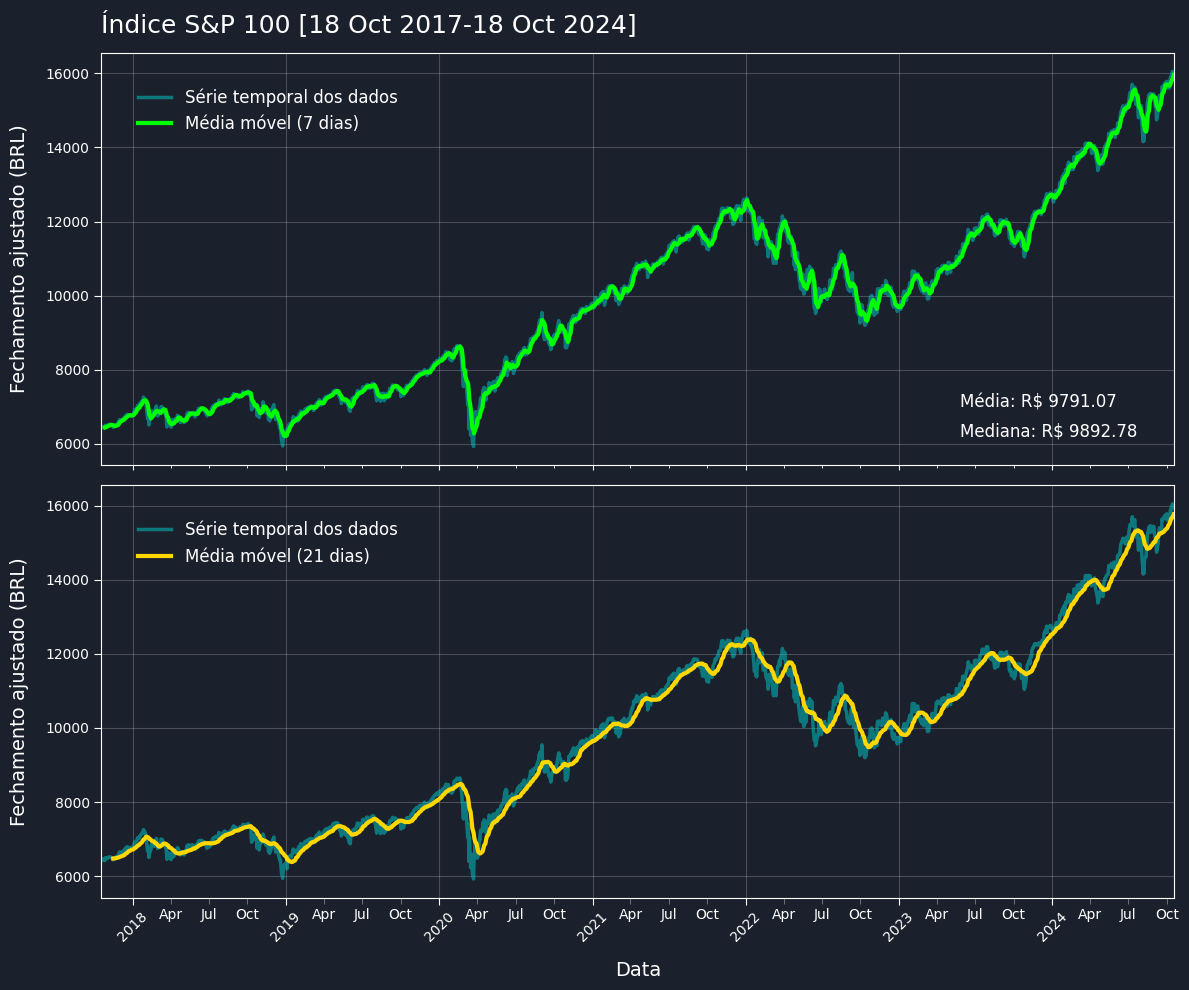

In [31]:
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Definição do nome da imagem que será gerada
nome_png = 'indice_sp100.png'

# Definição do intervalo da série temporal do índice
date_start = pd.Timestamp('2017-10-18')
date_end = pd.Timestamp('2024-10-18')

# Definição da taxa de câmbio em 18/10/2024 (1 BRL -> 5,695 USD)
taxa_cambio = 5.695

# Variável df recebe o DataFrame que queremos visualizar
df = sp100_dados
df_normalizado = sp100_dados.copy()

# Definição da coluna que será plotada
df_plot = df['Adj Close'] * taxa_cambio  # conversão de USD para BRL

# Normalização dos dados
df_normalizado['Adj Close Normalizado'] = df['Adj Close'] / df['Adj Close'].iloc[0]

# Cálculo das médias móveis
window_size_x = 7   # Janela para média móvel de x dias
window_size_y = 21  # Janela para média móvel de y dias, onde y > x
df_plot_smoothed_x = df_plot.rolling(window=window_size_x).mean()  # média móvel de x dias
df_plot_smoothed_y = df_plot.rolling(window=window_size_y).mean()  # média móvel de y dias

df_normalizado_smoothed_x = df_normalizado['Adj Close Normalizado'].rolling(window=window_size_x).mean()  # média móvel normalizada de x dias
df_normalizado_smoothed_y = df_normalizado['Adj Close Normalizado'].rolling(window=window_size_y).mean()  # média móvel normalizada de y dias

# Formatação das datas no título no formato 'DD Mês Abreviado AAAA'
date_start_str = date_start.strftime('%d %b %Y')
date_end_str = date_end.strftime('%d %b %Y')

x1 = df_plot.index
y1 = df_plot
y2 = df_plot_smoothed_x
y3 = df_plot_smoothed_y

# Calculando a média e a mediana dos dados normalizados
media_y1 = y1.mean()
mediana_y1 = y1.median()

# Customização do plot com subplots
plt.style.use('dark_background')            # Estilo para o gráfico
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True, facecolor='#1b212cff')  # Cria dois subplots (ax1 e ax2)

# Plot 1: série temporal do valor escolhida e seu média móvel de x dias
ax1.plot(x1, y1, label='Série temporal dos dados', alpha=0.5, color='darkturquoise', lw=2.5)  # Plot dos dados
ax1.plot(x1, y2, label=f'Média móvel ({window_size_x} dias)', color='lime', lw=3)     # Média móvel de x dias
ax1.set_title(f'Índice S&P 100 [{date_start_str}-{date_end_str}]', loc='left', fontsize=18, pad=15)
ax1.set_ylabel('Fechamento ajustado (BRL)', fontsize=14, labelpad=12)
ax1.tick_params(axis='y', labelsize=10, length=5)  # Transparência nos ticks do eixo y
ax1.legend(fontsize=12, loc='upper left', bbox_to_anchor=(0.02, 0.95), facecolor='#1b212cff', frameon=False)
ax1.grid(True, alpha=0.2)
ax1.set_facecolor('#1b212cff')

# Anotando média e mediana no plot 1
ax1.annotate(f'Média: R$ {media_y1:.2f}', xy=(0.8, 0.14), xycoords='axes fraction', fontsize=12, color='white', ha='left')
ax1.annotate(f'Mediana: R$ {mediana_y1:.2f}', xy=(0.8, 0.07), xycoords='axes fraction', fontsize=12, color='white', ha='left')

# Plot 2: série temporal do valor escolhida e seu média móvel de y dias
ax2.plot(x1, y1, label='Série temporal dos dados', alpha=0.5, color='darkturquoise', lw=2.5)  # Plot dos dados
ax2.plot(x1, y3, label=f'Média móvel ({window_size_y} dias)', color='gold', lw=3)        # Média móvel de y dias
ax2.set_xlabel('Data', fontsize=14, labelpad=12)
ax2.set_ylabel('Fechamento ajustado (BRL)', fontsize=14, labelpad=12)
ax2.tick_params(axis='x', labelsize=10, rotation=45, length=5)  # Transparência nos ticks do eixo x
ax2.tick_params(axis='y', labelsize=10, length=5)  # Transparência nos ticks do eixo y
ax2.legend(fontsize=12, loc='upper left', bbox_to_anchor=(0.02, 0.95), facecolor='#1b212cff', frameon=False)
ax2.grid(True, alpha=0.2)
ax2.set_facecolor('#1b212cff')

# Definir os ticks principais nos anos
ax2.xaxis.set_major_locator(mdates.YearLocator())          # Colocar tick a cada ano
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Formato para mostrar apenas o ano

# Definir os ticks secundários nos meses de abril, julho e outubro (sem linha de grade)
ax2.xaxis.set_minor_locator(mdates.MonthLocator(bymonth=[4, 7, 10]))  # Colocar tick em abril, julho, outubro
ax2.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))             # Mostrar meses abreviados (abr, jul, out)
ax2.tick_params(axis='x', which='minor', length=4, color='gray')  # Transparência nos ticks menores

# Definição do intervalo de datas
ax1.set_xlim(date_start, date_end)

# Ajuste do espaçamento entre os subplots
plt.tight_layout()

# Salvar a figura
plt.savefig(nome_png, dpi=300, facecolor='#1b212cff')


### Tradução de palavras do conjunto de dados referente ao índice

Para padronizar o idioma da apresentação, os dados sobre a distribuição setorial da composição do **S&P 100** são traduzidos para o português.

In [32]:
composicao_sp100 = pd.read_csv('OEF_holdings.csv')

composicao_sp100['Sector'].unique()

# Dicionário de tradução de setores
traducao_setores = {
    'Information Technology': 'Tecnologia de informação',
    'Consumer Discretionary': 'Consumo discricionário',
    'Communication': 'Comunicação',
    'Financials': 'Produtos financeiros',
    'Health Care': 'Cuidados de saúde',
    'Energy': 'Energia',
    'Consumer Staples': 'Bens de primeira necessidade',
    'Materials': 'Materiais',
    'Industrials': 'Materiais',
    'Utilities': 'Bens Industriais',
    'Real Estate': 'Imobiliário',
    'Cash and/or Derivatives': 'Caixa e/ou Derivativos'
}

composicao_sp100['Sector'] = composicao_sp100['Sector'].map(traducao_setores)
#composicao_sp100.head()
composicao_sp100['Sector'].unique()
composicao_sp100.head()

,Ticker,Name,Sector,Asset Class,Market Value,Weight (%),Notional Value,Quantity,Price,Location,Exchange,Currency,FX Rate,Market Currency,Accrual Date
0,AAPL,APPLE INC,Tecnologia de informação,Equity,1.474238e+09,10.39,1.474238e+09,6273352,235.00,United States,NASDAQ,USD,1,USD,-
1,NVDA,NVIDIA CORP,Tecnologia de informação,Equity,1.400723e+09,9.87,1.400723e+09,10150166,138.00,United States,NASDAQ,USD,1,USD,-
2,MSFT,MICROSOFT CORP,Tecnologia de informação,Equity,1.282470e+09,9.04,1.282470e+09,3066935,418.16,United States,NASDAQ,USD,1,USD,-
3,AMZN,AMAZON COM INC,Consumo discricionário,Equity,7.284041e+08,5.13,7.284041e+08,3854194,188.99,United States,NASDAQ,USD,1,USD,-
4,META,META PLATFORMS INC CLASS A,Comunicação,Equity,5.196514e+08,3.66,5.196514e+08,901437,576.47,United States,NASDAQ,USD,1,USD,-


### Visualização de dados: Composição do **S&P 100**

Visualização de dados sobre a distribuição setorial da composição do **S&P 100**. A quantidade de empresas e o valor de mercado são as variáveis apresentadas. Para obter o valor de mercado, foi usado a biblioteca `yfinance` novamente, onde cada ticker foi obtido de um .csv baixado do site iShares.

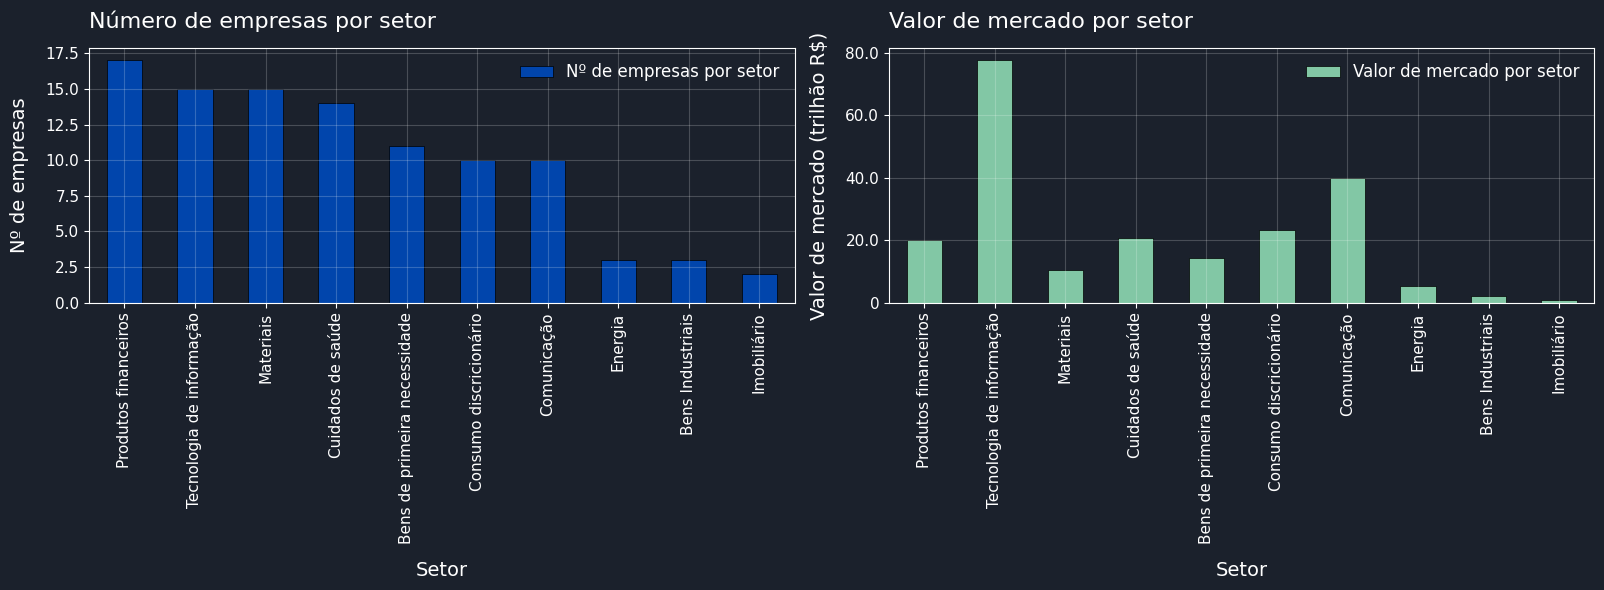

In [37]:
import matplotlib.ticker as mticker
#from google.colab import files

# Definição do nome da imagem que será gerada
nome_png = 'setores_sp100.png'

# Função para obter o valor de mercado das empresas
def obter_valor_mercado(ticker):
    try:
        acao = yf.Ticker(ticker)
        market_cap = acao.info['marketCap']  # Obtém o valor de mercado
        return market_cap
    except:
        return None  # Se houver erro, retorna None

# Adicionando a coluna 'Market Value' ao DataFrame com os valores de mercado reais
composicao_sp100['Market Value'] = composicao_sp100['Ticker'].apply(obter_valor_mercado)

# Definição da taxa de câmbio em 18/10/2024 (1 BRL -> 5,695 USD)
taxa_cambio = 5.695
composicao_sp100['Market Value BRL'] = composicao_sp100['Market Value'] * taxa_cambio # conversão de USD para BRL

# Filtrando os dados
composicao_sp100 = composicao_sp100.dropna(subset=['Market Value'])

# Contagem do número de empresas por setor e criação do DF empresas_por_setor
empresas_por_setor = composicao_sp100.Sector.value_counts().to_frame().reset_index()
empresas_por_setor.columns = ["Sector", "Nº de empresas por setor"]

# Criação do DF com os dados sobre setor e valor de mercado
valor_mercado_setor = composicao_sp100.groupby("Sector")["Market Value BRL"].sum().to_frame().reset_index()

# Para garantir que o plots terão a mesma ordem de componentes no eixo horizontal
valor_mercado_setor = valor_mercado_setor.set_index('Sector')
empresas_por_setor = empresas_por_setor.set_index('Sector')
valor_mercado_setor = valor_mercado_setor.loc[empresas_por_setor.index].reset_index()
empresas_por_setor = empresas_por_setor.reset_index()

# Criação dos plots
fig, ax = plt.subplots(1, 2, figsize=(16, 6), facecolor = '#1b212cff' )

# Plot de número de empresas por setor
empresas_por_setor.plot(x="Sector", y="Nº de empresas por setor", kind="bar", ax=ax[0], color="#0145ac", edgecolor='black', linewidth=0.5)
# Customizações do plot
ax[0].set_title("Número de empresas por setor", fontsize=16, pad=15, loc='left')
ax[0].set_ylabel("Nº de empresas", fontsize=14, labelpad=12)
ax[0].set_xlabel("Setor", fontsize=14, labelpad=12)
ax[0].tick_params(axis='x', labelsize=11)
ax[0].tick_params(axis='y', labelsize=11)
ax[0].legend(["Nº de empresas por setor"], loc='upper right', fontsize=12, facecolor='#1b212cff', frameon=False)
ax[0].set_facecolor('#1b212cff')
ax[0].grid(alpha = 0.2)

# Plot do valor de mercado por setor
valor_mercado_setor.plot(x="Sector", y="Market Value BRL", kind="bar", ax=ax[1], color="#82c7a5", edgecolor='black', linewidth=0.5)
# Customizações do plot
ax[1].set_title("Valor de mercado por setor", fontsize=16, pad=15, loc='left')
ax[1].set_ylabel("Valor de mercado (trilhão R$)", fontsize=14, labelpad=12)
ax[1].set_xlabel("Setor", fontsize=14, labelpad=12)
ax[1].tick_params(axis='x', labelsize=11)
ax[1].tick_params(axis='y', labelsize=11)
ax[1].legend(["Valor de mercado por setor"], loc='upper right', fontsize=12, facecolor='#1b212cff', frameon=False)
ax[1].set_facecolor('#1b212cff')
ax[1].grid(alpha = 0.2)

# Função para evitar notação científica
def scientific_format(x, pos):

    if x == 0:
        return "0"
    else:
        return f"{x * 1e-12:.1f}" # formatar em trilhões

# Aplicando a formatação acima no eixo vertical
ax[1].yaxis.set_major_formatter(mticker.FuncFormatter(scientific_format))

# Ajuste de espaçamento entre os subplots
plt.tight_layout()

# Salvar a figura
plt.savefig(nome_png, dpi=300, facecolor='#1b212cff')
plt.show()

# Baixar o arquivo salvo
#files.download(nome_png)


Visualização das 10 maiores empresas em valor de mercado que compõem o índice **S&P 100**.

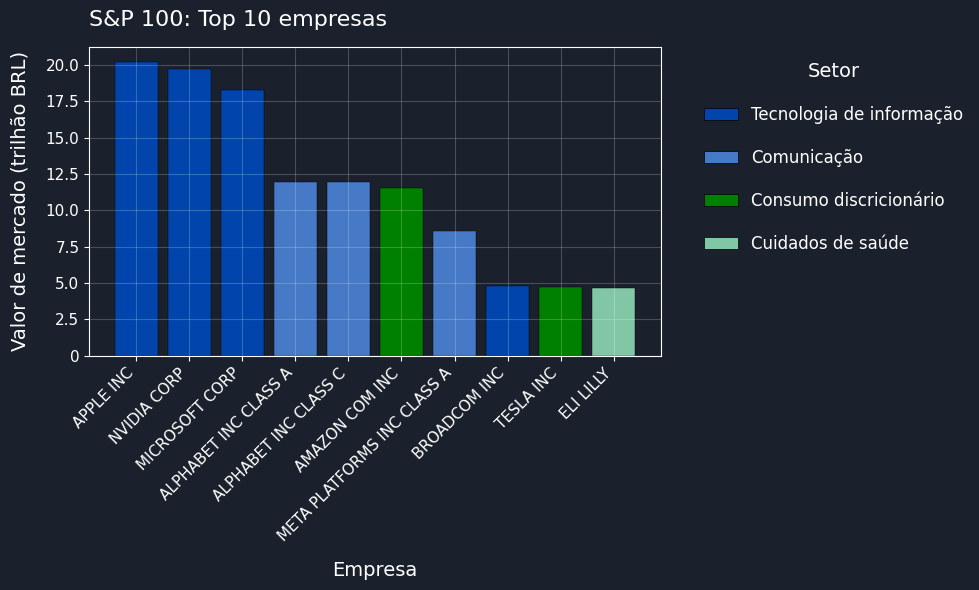

In [39]:
import matplotlib.ticker as mticker
#from google.colab import files

#cricao de uma paleta de cor
paleta_personalizada = sns.color_palette(["#0145ac", "#4679c6", "#008000", "#82c7a5"])

# Definição do nome da imagem que será gerada
nome_png = 'top10_sp100.png'

# Definição do data frame que será usado
df = composicao_sp100

# Selecionando as 10 empresas com maior valor de mercado em BRL
top_10_empresas = df[['Name', 'Sector', 'Market Value BRL']].copy()
top_10_empresas = top_10_empresas.sort_values(by='Market Value BRL', ascending=False).head(10)

# Customização das cores das barras do plot
unique_setores = top_10_empresas['Sector'].unique()
setor_cor = dict(zip(unique_setores, sns.color_palette(paleta_personalizada, len(unique_setores))))

# Atribuindo as cores para as barras do plot
top_10_empresas['Color'] = top_10_empresas['Sector'].map(setor_cor)

# Plot das 10 empresas com maior valor de mercado
fig, ax = plt.subplots(figsize=(10, 6), facecolor = '#1b212cff')

# Plotar as barras com as cores atribuídas para cada setor
bars = ax.bar(top_10_empresas['Name'], top_10_empresas['Market Value BRL'], color=top_10_empresas['Color'], edgecolor='black', linewidth=0.3)

# Criação de uma legenda dos setores
legend_handles = [plt.Rectangle((0, 0), 1, 1, facecolor=setor_cor[Setor], edgecolor='black', linewidth=0.5) for Setor in unique_setores]
ax.legend(legend_handles, unique_setores, title="Setor", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, 
          title_fontsize=14, labelspacing=1.5, facecolor='#1b212cff', frameon=False)

# Customização do plot
ax.set_title('S&P 100: Top 10 empresas', fontsize=16, pad=15, loc='left')
ax.set_ylabel('Valor de mercado (trilhão BRL)', fontsize=14, labelpad=12)
ax.set_xlabel('Empresa',fontsize=14, labelpad=12)
ax.tick_params(axis='x', labelsize=11)
ax.tick_params(axis='y', labelsize=11)
ax.yaxis.set_major_formatter(mticker.FuncFormatter(scientific_format)) # usando a função definida para evitar notação científica
ax.set_facecolor('#1b212cff')
ax.grid(alpha = 0.2)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Salvar a figura
plt.savefig(nome_png, dpi=300, facecolor='#1b212cff')

# Baixar o arquivo salvo
#files.download(nome_png)


## Visualização de dados: índice **IBOV**

Os passos realizados na seção de visualização de dados do índice **S&P 100** são repetidos abaixo, mas agora levando em conta o conjunto de dados referente ao **IBOV**.

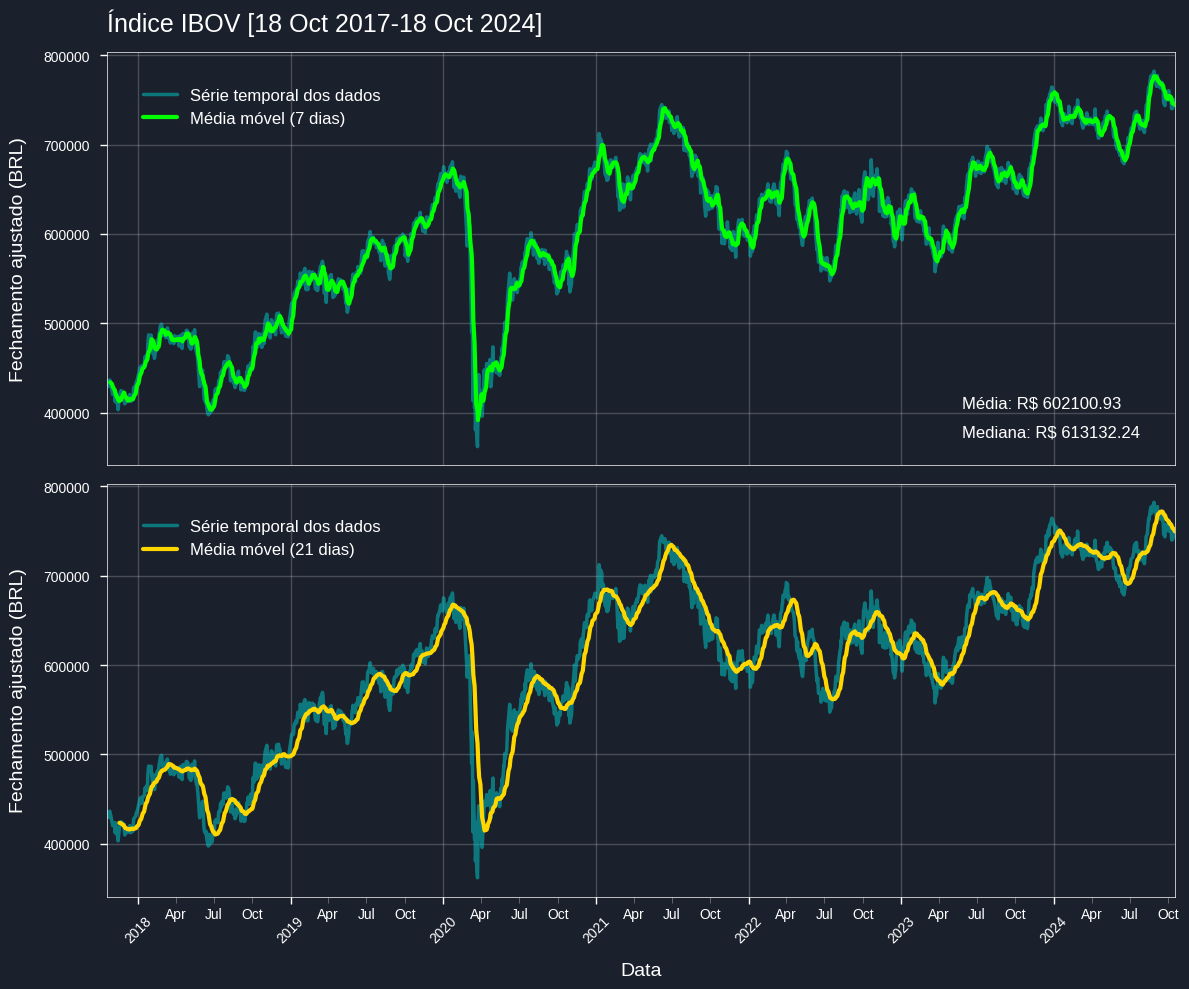

In [90]:
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Definição do nome da imagem que será gerada
nome_png = 'indice_bvsp.png'

# Definição do intervalo da série temporal do índice
date_start = pd.Timestamp('2017-10-18')
date_end = pd.Timestamp('2024-10-18')

# Definição da taxa de câmbio em 18/10/2024 (1 BRL -> 5,695 USD)
taxa_cambio = 5.695

# Variável df recebe o DataFrame que queremos visualizar
df = bvsp_dados
df_normalizado = bvsp_dados.copy()

# Definição da coluna que será plotada
df_plot = df['Adj Close'] * taxa_cambio  # conversão de USD para BRL

# Normalização dos dados
df_normalizado['Adj Close Normalizado'] = df['Adj Close'] / df['Adj Close'].iloc[0]

# Cálculo das médias móveis
window_size_x = 7   # Janela para média móvel de x dias
window_size_y = 21  # Janela para média móvel de y dias, onde y > x
df_plot_smoothed_x = df_plot.rolling(window=window_size_x).mean()  # média móvel de x dias
df_plot_smoothed_y = df_plot.rolling(window=window_size_y).mean()  # média móvel de y dias

df_normalizado_smoothed_x = df_normalizado['Adj Close Normalizado'].rolling(window=window_size_x).mean()  # média móvel normalizada de x dias
df_normalizado_smoothed_y = df_normalizado['Adj Close Normalizado'].rolling(window=window_size_y).mean()  # média móvel normalizada de y dias

# Formatação das datas no título no formato 'DD Mês Abreviado AAAA'
date_start_str = date_start.strftime('%d %b %Y')
date_end_str = date_end.strftime('%d %b %Y')

x1 = df_plot.index
y1 = df_plot
y2 = df_plot_smoothed_x
y3 = df_plot_smoothed_y

# Calculando a média e a mediana dos dados normalizados
media_y1 = y1.mean()
mediana_y1 = y1.median()

# Customização do plot com subplots
plt.style.use('dark_background')            # Estilo para o gráfico
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True, facecolor='#1b212cff')  # Cria dois subplots (ax1 e ax2)

# Plot 1: série temporal do valor escolhida e seu média móvel de x dias
ax1.plot(x1, y1, label='Série temporal dos dados', alpha=0.5, color='darkturquoise', lw=2.5)  # Plot dos dados
ax1.plot(x1, y2, label=f'Média móvel ({window_size_x} dias)', color='lime', lw=3)     # Média móvel de x dias
ax1.set_title(f'Índice IBOV [{date_start_str}-{date_end_str}]', loc='left', fontsize=18, pad=15)
ax1.set_ylabel('Fechamento ajustado (BRL)', fontsize=14, labelpad=12)
ax1.tick_params(axis='y', labelsize=10, length=5)  # Transparência nos ticks do eixo y
ax1.legend(fontsize=12, loc='upper left', bbox_to_anchor=(0.02, 0.95), facecolor='#1b212cff', frameon=False)
ax1.grid(True, alpha=0.2)
ax1.set_facecolor('#1b212cff')

# Anotando média e mediana no plot 1
ax1.annotate(f'Média: R$ {media_y1:.2f}', xy=(0.8, 0.14), xycoords='axes fraction', fontsize=12, color='white', ha='left')
ax1.annotate(f'Mediana: R$ {mediana_y1:.2f}', xy=(0.8, 0.07), xycoords='axes fraction', fontsize=12, color='white', ha='left')

# Adicionando borda ao redor do gráfico
for spine in ax1.spines.values():
    spine.set_visible(True)  # Ativar todas as bordas
    spine.set_edgecolor('white')  # Definir a cor da borda
    spine.set_linewidth(0.5)  # Definir a largura da borda

# Plot 2: série temporal do valor escolhida e seu média móvel de y dias
ax2.plot(x1, y1, label='Série temporal dos dados', alpha=0.5, color='darkturquoise', lw=2.5)  # Plot dos dados
ax2.plot(x1, y3, label=f'Média móvel ({window_size_y} dias)', color='gold', lw=3)        # Média móvel de y dias
ax2.set_xlabel('Data', fontsize=14, labelpad=12)
ax2.set_ylabel('Fechamento ajustado (BRL)', fontsize=14, labelpad=12)
ax2.tick_params(axis='x', labelsize=10, rotation=45, length=5)  # Transparência nos ticks do eixo x
ax2.tick_params(axis='y', labelsize=10, length=5)  # Transparência nos ticks do eixo y
ax2.legend(fontsize=12, loc='upper left', bbox_to_anchor=(0.02, 0.95), facecolor='#1b212cff', frameon=False)
ax2.grid(True, alpha=0.2)
ax2.set_facecolor('#1b212cff')

# Definir os ticks principais nos anos
ax2.xaxis.set_major_locator(mdates.YearLocator())          # Colocar tick a cada ano
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Formato para mostrar apenas o ano

# Definir os ticks secundários nos meses de abril, julho e outubro (sem linha de grade)
ax2.xaxis.set_minor_locator(mdates.MonthLocator(bymonth=[4, 7, 10]))  # Colocar tick em abril, julho, outubro
ax2.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))             # Mostrar meses abreviados (abr, jul, out)
ax2.tick_params(axis='x', which='minor', length=4, color='gray')  # Transparência nos ticks menores


# Adicionando borda ao redor do gráfico
for spine in ax2.spines.values():
    spine.set_visible(True)  # Ativar todas as bordas
    spine.set_edgecolor('white')  # Definir a cor da borda
    spine.set_linewidth(0.5)  # Definir a largura da borda

# Definição do intervalo de datas
ax1.set_xlim(date_start, date_end)

# Ajuste do espaçamento entre os subplots
plt.tight_layout()

# Salvar a figura
plt.savefig(nome_png, dpi=300, facecolor='#1b212cff')


### Visualização de dados: Composição do **IBOV**

Novamente, o que foi realizado para a visualização das informações sobre a composiação do **S&P 100** são repetidos, mas usando os dados do **IBOV**.

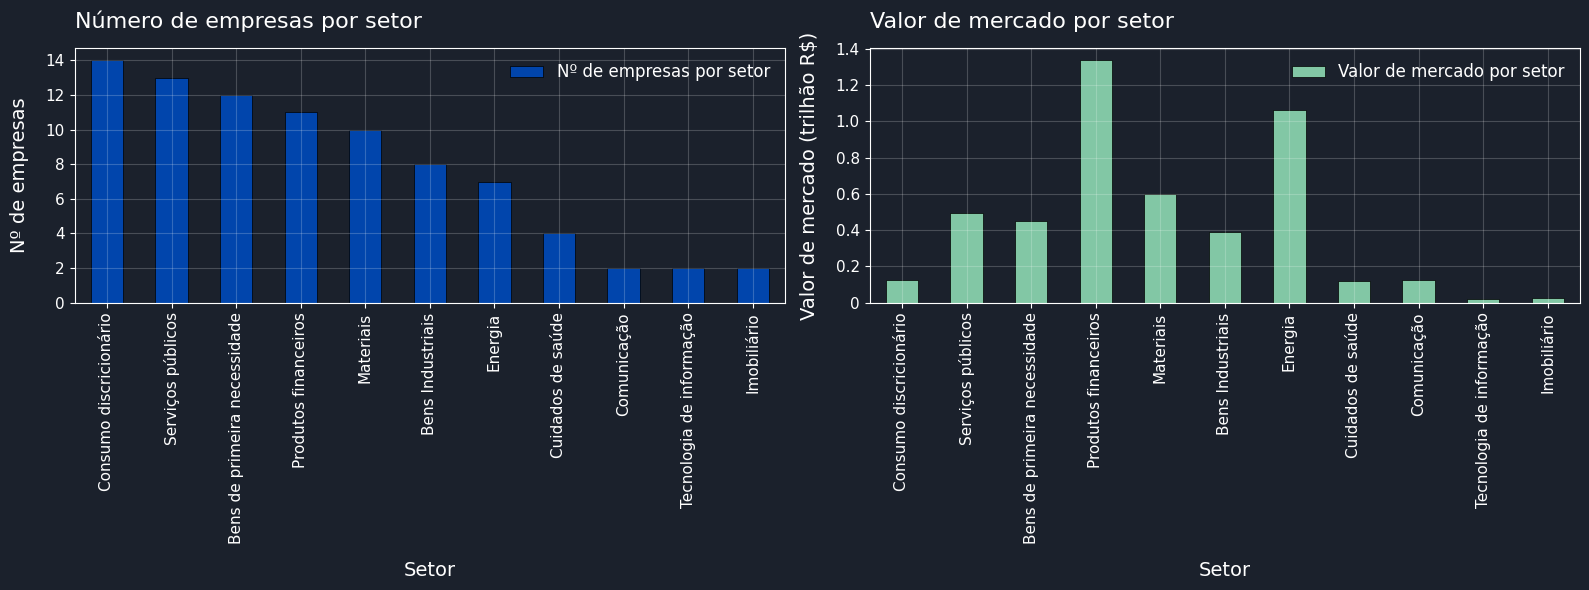

In [45]:
import matplotlib.ticker as mticker
#from google.colab import files

# Definição do nome da imagem que será gerada
nome_png = 'setores_bvsp.png'

# Função para obter o valor de mercado das empresas
def obter_valor_mercado(ticker):
    try:
        acao = yf.Ticker(ticker + '.SA')
        market_cap = acao.info['marketCap']  # Obtém o valor de mercado
        return market_cap
    except:
        return None  # Se houver erro, retorna None

# Adicionando a coluna 'Market Value' ao DataFrame com os valores de mercado reais
composicao_bvsp['Market Value'] = composicao_bvsp['Ticker'].apply(obter_valor_mercado)

# Definição da taxa de câmbio em 18/10/2024 (1 BRL -> 5,695 USD)
taxa_cambio = 1.000
composicao_bvsp['Market Value BRL'] = composicao_bvsp['Market Value'] * taxa_cambio # conversão de USD para BRL

# Filtrando os dados
composicao_bvsp = composicao_bvsp.dropna(subset=['Market Value'])

# Contagem do número de empresas por setor e criação do DF empresas_por_setor
empresas_por_setor = composicao_bvsp.Sector.value_counts().to_frame().reset_index()
empresas_por_setor.columns = ["Sector", "Nº de empresas por setor"]

# Criação do DF com os dados sobre setor e valor de mercado
valor_mercado_setor = composicao_bvsp.groupby("Sector")["Market Value BRL"].sum().to_frame().reset_index()

# Para garantir que o plots terão a mesma ordem de componentes no eixo horizontal
valor_mercado_setor = valor_mercado_setor.set_index('Sector')
empresas_por_setor = empresas_por_setor.set_index('Sector')
valor_mercado_setor = valor_mercado_setor.loc[empresas_por_setor.index].reset_index()
empresas_por_setor = empresas_por_setor.reset_index()

# Criação dos plots
fig, ax = plt.subplots(1, 2, figsize=(16, 6), facecolor = '#1b212cff' )

# Plot de número de empresas por setor
empresas_por_setor.plot(x="Sector", y="Nº de empresas por setor", kind="bar", ax=ax[0], color="#0145ac", edgecolor='black', linewidth=0.5)
# Customizações do plot
ax[0].set_title("Número de empresas por setor", fontsize=16, pad=15, loc='left')
ax[0].set_ylabel("Nº de empresas", fontsize=14, labelpad=12)
ax[0].set_xlabel("Setor", fontsize=14, labelpad=12)
ax[0].tick_params(axis='x', labelsize=11)
ax[0].tick_params(axis='y', labelsize=11)
ax[0].legend(["Nº de empresas por setor"], loc='upper right', fontsize=12, facecolor='#1b212cff', frameon=False)
ax[0].set_facecolor('#1b212cff')
ax[0].grid(alpha = 0.2)

# Plot do valor de mercado por setor
valor_mercado_setor.plot(x="Sector", y="Market Value BRL", kind="bar", ax=ax[1], color="#82c7a5", edgecolor='black', linewidth=0.5)
# Customizações do plot
ax[1].set_title("Valor de mercado por setor", fontsize=16, pad=15, loc='left')
ax[1].set_ylabel("Valor de mercado (trilhão R$)", fontsize=14, labelpad=12)
ax[1].set_xlabel("Setor", fontsize=14, labelpad=12)
ax[1].tick_params(axis='x', labelsize=11)
ax[1].tick_params(axis='y', labelsize=11)
ax[1].legend(["Valor de mercado por setor"], loc='upper right', fontsize=12, facecolor='#1b212cff', frameon=False)
ax[1].set_facecolor('#1b212cff')
ax[1].grid(alpha = 0.2)

# Função para evitar notação científica
def scientific_format(x, pos):

    if x == 0:
        return "0"
    else:
        return f"{x * 1e-12:.1f}" # formatar em trilhões

# Aplicando a formatação acima no eixo vertical
ax[1].yaxis.set_major_formatter(mticker.FuncFormatter(scientific_format))

# Ajuste de espaçamento entre os subplots
plt.tight_layout()

# Salvar a figura
plt.savefig(nome_png, dpi=300, facecolor='#1b212cff')
plt.show()

# Baixar o arquivo salvo
#files.download(nome_png)


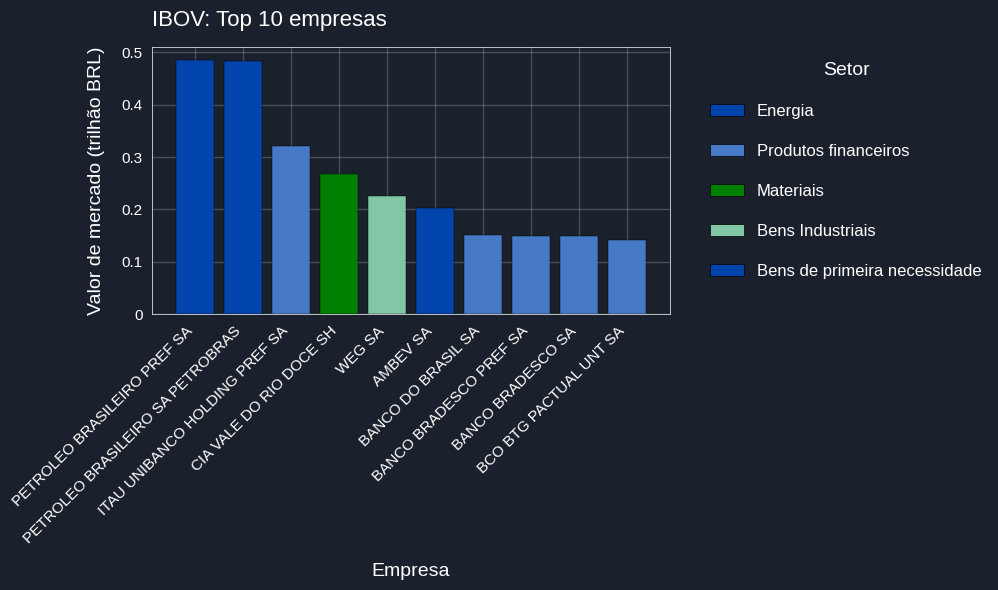

In [89]:
import matplotlib.ticker as mticker
#from google.colab import files

#cricao de uma paleta de cor
paleta_personalizada = sns.color_palette(["#0145ac", "#4679c6", "#008000", "#82c7a5"])

# Definição do nome da imagem que será gerada
nome_png = 'top10_bvsp.png'

# Definição do data frame que será usado
df = composicao_bvsp

# Selecionando as 10 empresas com maior valor de mercado em BRL
top_10_empresas = df[['Name', 'Sector', 'Market Value BRL']].copy()
top_10_empresas = top_10_empresas.sort_values(by='Market Value BRL', ascending=False).head(10)

# Customização das cores das barras do plot
unique_setores = top_10_empresas['Sector'].unique()
setor_cor = dict(zip(unique_setores, sns.color_palette(paleta_personalizada, len(unique_setores))))

# Atribuindo as cores para as barras do plot
top_10_empresas['Color'] = top_10_empresas['Sector'].map(setor_cor)

# Plot das 10 empresas com maior valor de mercado
fig, ax = plt.subplots(figsize=(10, 6), facecolor = '#1b212cff')

# Plotar as barras com as cores atribuídas para cada setor
bars = ax.bar(top_10_empresas['Name'], top_10_empresas['Market Value BRL'], color=top_10_empresas['Color'], edgecolor='black', linewidth=0.3)

# Criação de uma legenda dos setores
legend_handles = [plt.Rectangle((0, 0), 1, 1, facecolor=setor_cor[Setor], edgecolor='black', linewidth=0.5) for Setor in unique_setores]
ax.legend(legend_handles, unique_setores, title="Setor", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, 
          title_fontsize=14, labelspacing=1.5, facecolor='#1b212cff', frameon=False)

# Customização do plot
ax.set_title('IBOV: Top 10 empresas', fontsize=16, pad=15, loc='left')
ax.set_ylabel('Valor de mercado (trilhão BRL)', fontsize=14, labelpad=12)
ax.set_xlabel('Empresa',fontsize=14, labelpad=12)
ax.tick_params(axis='x', labelsize=11)
ax.tick_params(axis='y', labelsize=11)
ax.yaxis.set_major_formatter(mticker.FuncFormatter(scientific_format)) # usando a função definida para evitar notação científica
ax.set_facecolor('#1b212cff')
ax.grid(alpha = 0.2)

# Adicionando borda ao redor do gráfico
for spine in ax.spines.values():
    spine.set_visible(True)  # Ativar todas as bordas
    spine.set_edgecolor('white')  # Definir a cor da borda
    spine.set_linewidth(0.5)  # Definir a largura da borda

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Salvar a figura
plt.savefig(nome_png, dpi=300, facecolor='#1b212cff')

# Baixar o arquivo salvo
#files.download(nome_png)


## Comparação entre índices

Para comparar os dois índices, que possuem suas métricas específicas para medir o desempenho, a normalização realizada foi idêntica a anterior. Tomando-se a razão entre o valor plotado em um tempo $\delta_t$ e o valor inicial $\delta_0$.Uma vez definida a normalização, a série temporal dos índices, assim como seus retornos acumulados e volatilidade foram comparados.

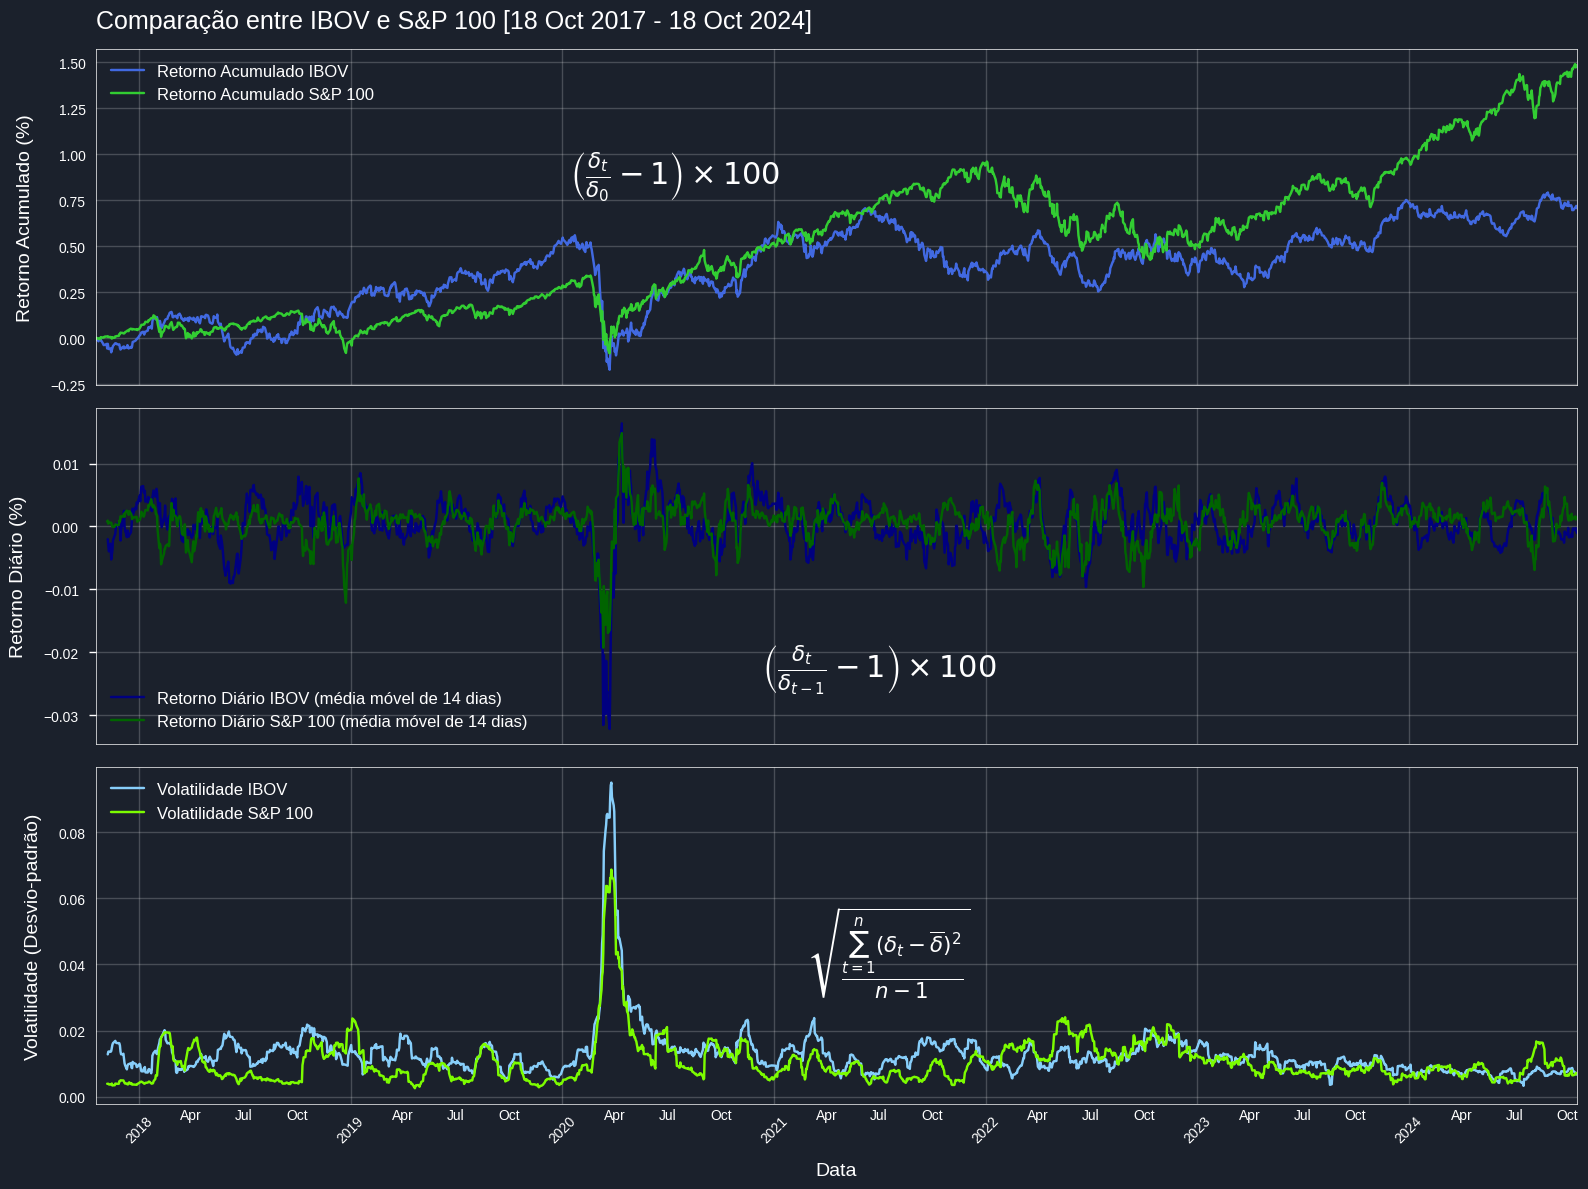

In [88]:
import matplotlib.dates as mdates
import pandas as pd
import matplotlib.pyplot as plt

# Definição do intervalo da série temporal do índice
date_start = pd.Timestamp('2017-10-18')
date_end = pd.Timestamp('2024-10-18')

# Definição do nome da imagem que será gerada
nome_png = 'comparacao_indices.png'

# Variáveis abaixo recebem os DataFrames que queremos visualizar
df_bvsp = bvsp_dados.copy()
df_sp100 = sp100_dados.copy()

# Filtrar o intervalo de datas para ambos os índices
df_bvsp = df_bvsp[(df_bvsp.index >= date_start) & (df_bvsp.index <= date_end)]
df_sp100 = df_sp100[(df_sp100.index >= date_start) & (df_sp100.index <= date_end)]

# Cálculo do retorno periódico (diário)
df_bvsp['Retorno Diário'] = df_bvsp['Adj Close'].pct_change()
df_sp100['Retorno Diário'] = df_sp100['Adj Close'].pct_change()

# Cálculo da média móvel dos retornos diários
window_size = 14  # Janela para média móvel de x dias
df_bvsp['Retorno Diário Smoothed'] = df_bvsp['Retorno Diário'].rolling(window=window_size).mean()
df_sp100['Retorno Diário Smoothed'] = df_sp100['Retorno Diário'].rolling(window=window_size).mean()

# Formatação das datas no título no formato 'DD Mês Abreviado AAAA'
date_start_str = date_start.strftime('%d %b %Y')
date_end_str = date_end.strftime('%d %b %Y')

# Definição das variáveis que serão plotadas
x1 = df_bvsp.index
y1 = df_bvsp['Retorno Diário Smoothed']
x2 = df_sp100.index
y2 = df_sp100['Retorno Diário Smoothed']

# Customização do plot com subplots
plt.style.use('dark_background')
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16, 12), sharex=True, facecolor='#1b212cff')  # Cria três subplots (ax1, ax2 e ax3)

# Plot 1: Retornos Acumulados
df_bvsp['Retorno Acumulado'] = (df_bvsp['Adj Close'] / df_bvsp['Adj Close'].iloc[0]) - 1
df_sp100['Retorno Acumulado'] = (df_sp100['Adj Close'] / df_sp100['Adj Close'].iloc[0]) - 1
ax1.plot(df_bvsp.index, df_bvsp['Retorno Acumulado'], label='Retorno Acumulado IBOV', color='royalblue')
ax1.plot(df_sp100.index, df_sp100['Retorno Acumulado'], label='Retorno Acumulado S&P 100', color='limegreen')
ax1.set_title(f'Comparação entre IBOV e S&P 100 [{date_start_str} - {date_end_str}]', loc='left', fontsize=18, pad=15)
ax1.set_ylabel('Retorno Acumulado (%)', fontsize=14, labelpad=12)
ax1.legend(fontsize=12, loc='upper left')
ax1.grid(True, alpha=0.2)
ax1.set_facecolor('#1b212cff')

# Adicionando borda ao redor do gráfico
for spine in ax1.spines.values():
    spine.set_visible(True)  # Ativar todas as bordas
    spine.set_edgecolor('white')  # Definir a cor da borda
    spine.set_linewidth(0.5)  # Definir a largura da borda

# Plot 2: Retorno Periódico Diário (média móvel)
ax2.plot(x1, y1, label=f'Retorno Diário IBOV (média móvel de {window_size} dias)', color='navy')
ax2.plot(x2, y2, label=f'Retorno Diário S&P 100 (média móvel de {window_size} dias)', color='darkgreen')
ax2.set_ylabel('Retorno Diário (%)', fontsize=14, labelpad=12)
ax2.tick_params(axis='y', labelsize=10, length=5)
ax2.legend(fontsize=12, loc='lower left')
ax2.grid(True, alpha=0.2)
ax2.set_facecolor('#1b212cff')

# Adicionando borda ao redor do gráfico
for spine in ax2.spines.values():
    spine.set_visible(True)  # Ativar todas as bordas
    spine.set_edgecolor('white')  # Definir a cor da borda
    spine.set_linewidth(0.5)  # Definir a largura da borda

# Plot 3: Volatilidade
df_bvsp['Volatilidade'] = df_bvsp['Retorno Diário'].rolling(window=window_size).std()
df_sp100['Volatilidade'] = df_sp100['Retorno Diário'].rolling(window=window_size).std()
ax3.plot(df_bvsp.index, df_bvsp['Volatilidade'], label='Volatilidade IBOV', color='lightskyblue')
ax3.plot(df_sp100.index, df_sp100['Volatilidade'], label='Volatilidade S&P 100', color='lawngreen')
ax3.set_xlabel('Data', fontsize=14, labelpad=12)
ax3.set_ylabel('Volatilidade (Desvio-padrão)', fontsize=14, labelpad=12)
ax3.legend(fontsize=12, loc='upper left')
ax3.grid(True, alpha=0.2)
ax3.set_facecolor('#1b212cff')

# Adicionando borda ao redor do gráfico
for spine in ax3.spines.values():
    spine.set_visible(True)  # Ativar todas as bordas
    spine.set_edgecolor('white')  # Definir a cor da borda
    spine.set_linewidth(0.5)  # Definir a largura da borda

# Definição dos ticks principais nos anos
ax3.xaxis.set_major_locator(mdates.YearLocator())          # Colocar tick a cada ano
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Formato para mostrar apenas o ano

# Definição dos ticks secundários nos meses de abril, julho e outubro
ax3.xaxis.set_minor_locator(mdates.MonthLocator(bymonth=[4, 7, 10]))  # Colocar tick em abril, julho, outubro
ax3.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))             # Mostrar meses abreviados (abr, jul, out)

# Rotação do xticks
ax3.tick_params(axis='x', rotation=45)

# Definição do intervalo de datas
ax1.set_xlim(date_start, date_end)

ax1.annotate(r'$\left(\frac{\delta_t}{\delta_0} - 1\right) \times 100$', xy=(0.32, 0.6), xycoords='axes fraction', fontsize=22, color='white', ha='left')
ax2.annotate(r'$\left(\frac{\delta_t}{\delta_{t-1}} - 1\right) \times 100$', xy=(0.45, 0.2), xycoords='axes fraction', fontsize=22, color='white', ha='left')
ax3.annotate(r'$\sqrt{\frac{\sum_{t=1}^{n}(\delta_t - \overline{\delta})^2}{n - 1}}$', xy=(0.48, 0.35), xycoords='axes fraction', fontsize=22, color='white', ha='left')

# Ajuste do espaçamento entre os subplots
plt.tight_layout()

# Salvar a figura
plt.savefig(nome_png, dpi=300, facecolor='#1b212cff')

# Baixar o arquivo salvo
#files.download(nome_png)


## Comparação **S&P 100** e seus ativos

Abaixo, há a comparação do índice com ao menos 5 ativos que o compõem. Os cinco melhores e os cinco piores ativos são comparados com o índice.

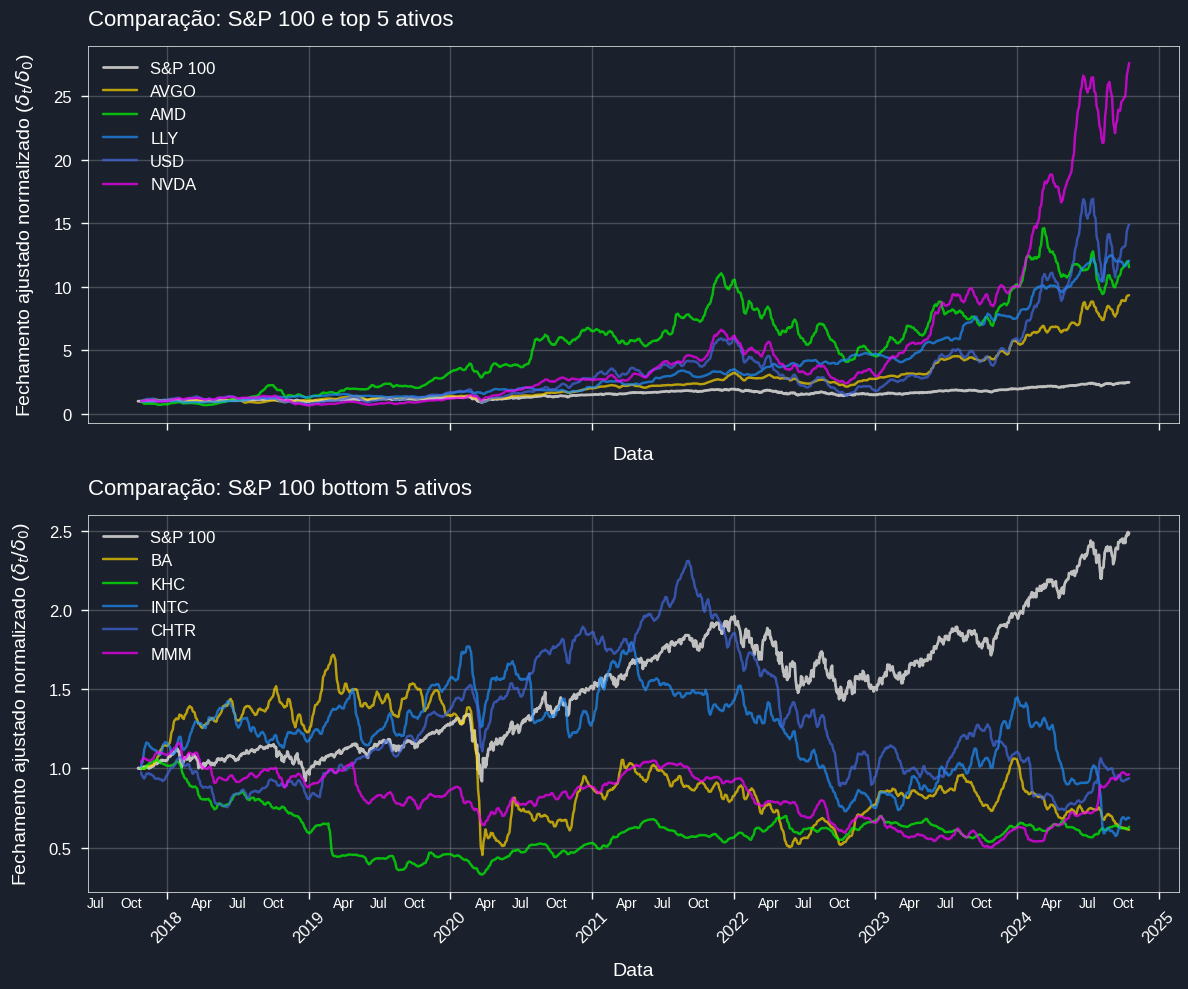

In [72]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from itertools import cycle

# Definição do intervalo da série temporal do índice
date_start = pd.Timestamp('2017-10-18')
date_end = pd.Timestamp('2024-10-18')

nome_png = 'sp100_tops_bottoms_temporal.png'

# Garantir que as colunas 'Date' e 'Adj Close' estejam no formato adequado
sp100_ativos_historical = sp100_ativos_hist.copy()
sp100_ativos_historical['Date'] = pd.to_datetime(sp100_ativos_historical['Date'])
sp100_ativos_historical['Adj Close'] = pd.to_numeric(sp100_ativos_historical['Adj Close'], errors='coerce')

# Filtrar os dados do índice S&P 100 no intervalo de datas e garantir que 'Adj Close' seja numérico
df_sp100 = sp100_dados[(sp100_dados.index >= date_start) & (sp100_dados.index <= date_end)]
df_sp100['Adj Close'] = pd.to_numeric(df_sp100['Adj Close'], errors='coerce')
df_sp100['Adj Close Normalizado'] = df_sp100['Adj Close'] / df_sp100['Adj Close'].iloc[0]

# Filtrar os dados de todos os ativos no intervalo de datas
ativos_historical_filtrado = sp100_ativos_historical[(sp100_ativos_historical['Date'] >= date_start) & (sp100_ativos_historical['Date'] <= date_end)]

# Normalizar os preços de fechamento ajustado de todos os ativos
ativos_historical_filtrado['Adj Close Normalizado'] = ativos_historical_filtrado.groupby('Symbol')['Adj Close'].transform(lambda x: x / x.iloc[0])

# Calcular o retorno acumulado final para cada ativo
ativos_finais = ativos_historical_filtrado.groupby('Symbol')['Adj Close Normalizado'].last().sort_values()

# Selecionar os 5 melhores e 5 piores ativos
melhores_ativos = ativos_finais.tail(5).index
piores_ativos = ativos_finais.head(5).index

cores = cycle(['gold', 'lime', 'dodgerblue', 'royalblue', 'fuchsia'])

def plot_comparacao_ativos(ax, ativos, titulo):
    # Plotar o índice S&P 100 normalizado
    ax.plot(df_sp100.index, df_sp100['Adj Close Normalizado'], label='S&P 100', color='silver', linewidth=2)

    # Plotar os dados normalizados dos ativos selecionados
    for ativo in ativos:
        # Filtrar os dados do ativo específico
        ativo_data = ativos_historical_filtrado[ativos_historical_filtrado['Symbol'] == ativo].copy()

        # Adicionar média móvel
        window_size = 7   # Tamanho da janela da média móvel
        ativo_data['Adj Close Normalizado Smoothed'] = ativo_data['Adj Close Normalizado'].rolling(window=window_size).mean()

        cor_atual = next(cores)

        # Plotando o ativo normalizado
        ax.plot(ativo_data['Date'], ativo_data['Adj Close Normalizado Smoothed'], color=cor_atual, label=f'{ativo}', alpha=0.7)

    # Customizando o gráfico
    ax.set_title(titulo, loc='left', fontsize=16, pad=15)
    ax.set_xlabel('Data', fontsize=14, labelpad=12)
    ax.set_ylabel('Fechamento ajustado normalizado ($\delta_t / \delta_0$)', fontsize=14, labelpad=12)
    ax.legend(fontsize=12, loc='upper left')
    ax.tick_params(axis='x', labelsize=12, length=5)
    ax.tick_params(axis='y', labelsize=12, length=5)
    ax.grid(True, alpha=0.2)

    # Definição dos ticks principais nos anos (com linha de grade)
    ax.xaxis.set_major_locator(mdates.YearLocator())  # Colocar tick a cada ano
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Formato para mostrar apenas o ano

    # Definição dos ticks secundários nos meses de abril, julho e outubro (sem linha de grade)
    ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonth=[4, 7, 10]))  # Colocar tick em abril, julho, outubro
    ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))             # Mostrar meses abreviados (abr, jul, out)

    # Rotação dos xticks
    ax.tick_params(axis='x', rotation=45)

    # Adicionando borda ao redor do gráfico
    for spine in ax.spines.values():
        spine.set_visible(True)  # Ativar todas as bordas
        spine.set_edgecolor('white')  # Definir a cor da borda
        spine.set_linewidth(0.5)  # Definir a largura da borda

# Inicializando o plot com dois subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)
fig.patch.set_facecolor('#1b212cff')  # Definindo a cor de fundo da figura
ax1.set_facecolor('#1b212cff')  # Definindo a cor de fundo do eixo 1
ax2.set_facecolor('#1b212cff')  # Definindo a cor de fundo do eixo 2

# Plot tops
plot_comparacao_ativos(ax1, melhores_ativos, 'Comparação: S&P 100 e top 5 ativos')

# Plot bottoms
plot_comparacao_ativos(ax2, piores_ativos, 'Comparação: S&P 100 bottom 5 ativos')

# Ajustar o layout para evitar sobreposição de labels
plt.tight_layout()

# Salvar a figura
plt.savefig(nome_png, dpi=300, facecolor='#1b212cff')

# Baixar o arquivo salvo
# files.download(nome_png)  # Descomente se estiver usando o Google Colab


## Comparação **IBOV** e seus ativos

O procedimento para a comparação entre **S&P 100** e seus ativos, foi repetido abaixo para obter as mesmas figuras para o **IBOV**.

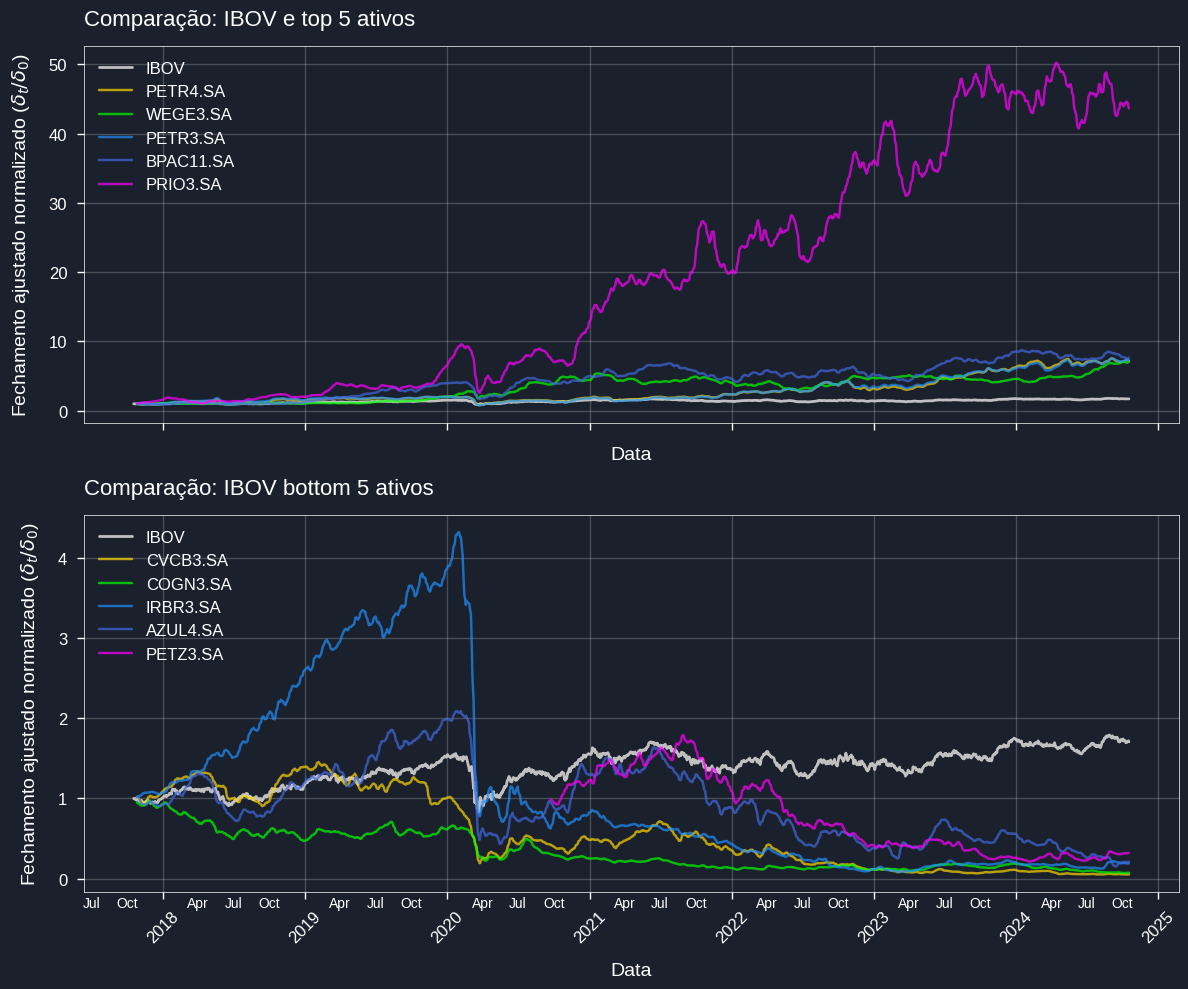

In [80]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from itertools import cycle

# Definição do intervalo da série temporal do índice
date_start = pd.Timestamp('2017-10-18')
date_end = pd.Timestamp('2024-10-18')

nome_png = 'bvsp_tops_bottoms_temporal.png'

# Garantir que as colunas 'Date' e 'Adj Close' estejam no formato adequado
bvsp_ativos_historical = bvsp_ativos_hist.copy()
bvsp_ativos_historical['Date'] = pd.to_datetime(bvsp_ativos_historical['Date'])
bvsp_ativos_historical['Adj Close'] = pd.to_numeric(bvsp_ativos_historical['Adj Close'], errors='coerce')

# Filtrar os dados do índice S&P 100 no intervalo de datas e garantir que 'Adj Close' seja numérico
df_bvsp = bvsp_dados[(bvsp_dados.index >= date_start) & (bvsp_dados.index <= date_end)]
df_bvsp['Adj Close'] = pd.to_numeric(df_bvsp['Adj Close'], errors='coerce')
df_bvsp['Adj Close Normalizado'] = df_bvsp['Adj Close'] / df_bvsp['Adj Close'].iloc[0]

# Filtrar os dados de todos os ativos no intervalo de datas
ativos_historical_filtrado = bvsp_ativos_historical[(bvsp_ativos_historical['Date'] >= date_start) & (bvsp_ativos_historical['Date'] <= date_end)]

# Normalizar os preços de fechamento ajustado de todos os ativos
ativos_historical_filtrado['Adj Close Normalizado'] = ativos_historical_filtrado.groupby('Symbol')['Adj Close'].transform(lambda x: x / x.iloc[0])

# Calcular o retorno acumulado final para cada ativo
ativos_finais = ativos_historical_filtrado.groupby('Symbol')['Adj Close Normalizado'].last().sort_values()

# Selecionar os 5 melhores e 5 piores ativos
melhores_ativos = ativos_finais.tail(5).index
piores_ativos = ativos_finais.head(5).index

cores = cycle(['gold', 'lime', 'dodgerblue', 'royalblue', 'fuchsia'])

def plot_comparacao_ativos(ax, ativos, titulo):
    # Plotar o índice S&P 100 normalizado
    ax.plot(df_bvsp.index, df_bvsp['Adj Close Normalizado'], label='IBOV', color='silver', linewidth=2)

    # Plotar os dados normalizados dos ativos selecionados
    for ativo in ativos:
        # Filtrar os dados do ativo específico
        ativo_data = ativos_historical_filtrado[ativos_historical_filtrado['Symbol'] == ativo].copy()

        # Adicionar média móvel
        window_size = 7   # Tamanho da janela da média móvel
        ativo_data['Adj Close Normalizado Smoothed'] = ativo_data['Adj Close Normalizado'].rolling(window=window_size).mean()

        cor_atual = next(cores)

        # Plotando o ativo normalizado
        ax.plot(ativo_data['Date'], ativo_data['Adj Close Normalizado Smoothed'], color=cor_atual, label=f'{ativo}', alpha=0.7)

    # Customizando o gráfico
    ax.set_title(titulo, loc='left', fontsize=16, pad=15)
    ax.set_xlabel('Data', fontsize=14, labelpad=12)
    ax.set_ylabel('Fechamento ajustado normalizado ($\delta_t / \delta_0$)', fontsize=14, labelpad=12)
    ax.legend(fontsize=12, loc='upper left')
    ax.tick_params(axis='x', labelsize=12, length=5)
    ax.tick_params(axis='y', labelsize=12, length=5)
    ax.grid(True, alpha=0.2)

    # Definição dos ticks principais nos anos (com linha de grade)
    ax.xaxis.set_major_locator(mdates.YearLocator())  # Colocar tick a cada ano
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Formato para mostrar apenas o ano

    # Definição dos ticks secundários nos meses de abril, julho e outubro (sem linha de grade)
    ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonth=[4, 7, 10]))  # Colocar tick em abril, julho, outubro
    ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))             # Mostrar meses abreviados (abr, jul, out)

    # Rotação dos xticks
    ax.tick_params(axis='x', rotation=45)

    # Adicionando borda ao redor do gráfico
    for spine in ax.spines.values():
        spine.set_visible(True)  # Ativar todas as bordas
        spine.set_edgecolor('white')  # Definir a cor da borda
        spine.set_linewidth(0.5)  # Definir a largura da borda

# Inicializando o plot com dois subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)
fig.patch.set_facecolor('#1b212cff')  # Definindo a cor de fundo da figura
ax1.set_facecolor('#1b212cff')  # Definindo a cor de fundo do eixo 1
ax2.set_facecolor('#1b212cff')  # Definindo a cor de fundo do eixo 2

# Plot tops
plot_comparacao_ativos(ax1, melhores_ativos, 'Comparação: IBOV e top 5 ativos')

# Plot bottoms
plot_comparacao_ativos(ax2, piores_ativos, 'Comparação: IBOV bottom 5 ativos')

# Ajustar o layout para evitar sobreposição de labels
plt.tight_layout()

# Salvar a figura
plt.savefig(nome_png, dpi=300, facecolor='#1b212cff')

# Baixar o arquivo salvo
# files.download(nome_png)  # Descomente se estiver usando o Google Colab


## Heatmap

Visualizações de heatmap foram criadas para observar mais a fundo a distribuição setorial das composições dos índices.


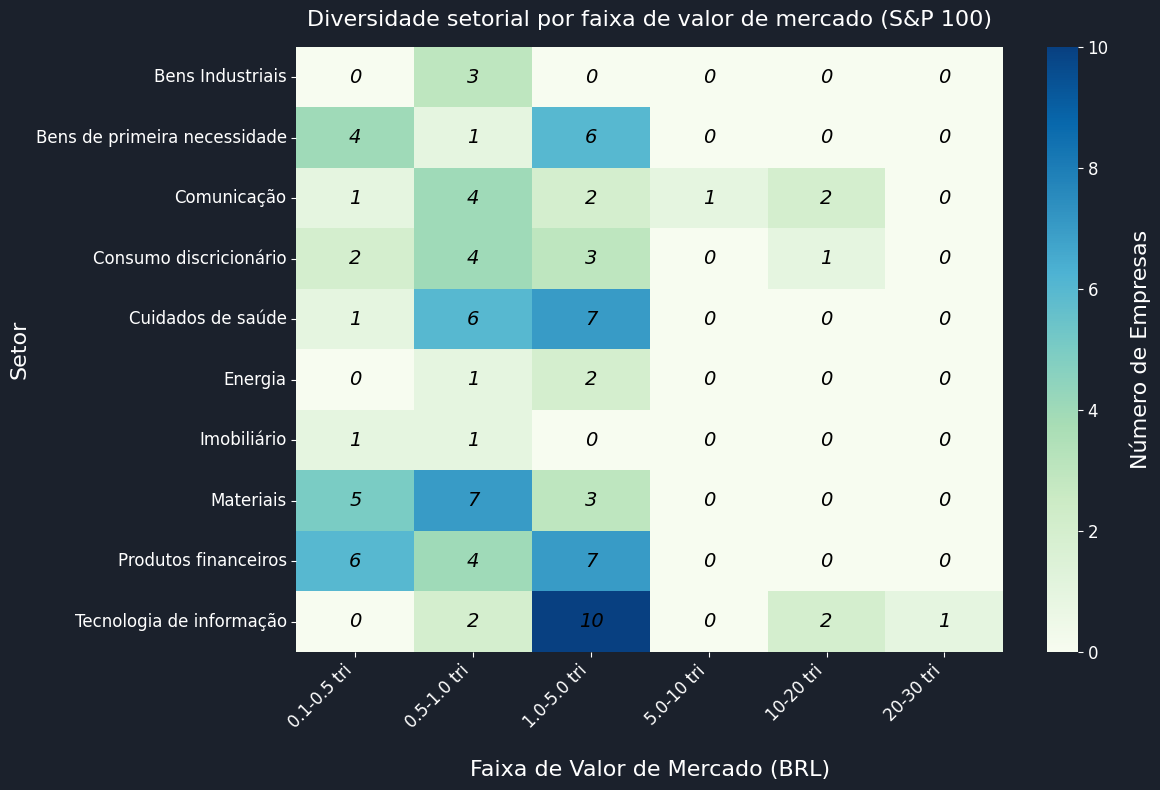

In [47]:
from matplotlib.colors import ListedColormap
nome_png = 'heatmap_sp100.png'

# Definição da taxa de câmbio em 18/10/2024 (1 BRL -> 5,695 USD)
taxa_cambio = 5.695
composicao_sp100['Market Value BRL'] = composicao_sp100['Market Value'] * taxa_cambio

paleta_personalizada = ["#0145ac", "#4679c6", "#008000", "#82c7a5"]
cores = ListedColormap(paleta_personalizada)

# Filtrando dados
composicao_sp100 = composicao_sp100.dropna(subset=['Market Value'])

# Classificação das empresas em faixas de valor de mercado (em BRL)
faixas = [0, 10e9, 50e9, 100e9, 500e9, 1e12, 5e12, 10e12, 20e12, 30e12]
labels = ['Até 10 bi', '10-50 bi', '50-100 bi', '0.1-0.5 tri', '0.5-1.0 tri', '1.0-5.0 tri', '5.0-10 tri', '10-20 tri', '20-30 tri']
composicao_sp100['Faixa de Valor de Mercado'] = pd.cut(composicao_sp100['Market Value BRL'], bins=faixas, labels=labels)

# Criação de table para o heatmap
heatmap_data = pd.crosstab(composicao_sp100['Sector'], composicao_sp100['Faixa de Valor de Mercado'])

# Plot do heatmap
plt.figure(figsize=(12, 8), facecolor = '#1b212cff' )
ax = sns.heatmap(
    heatmap_data,
    annot=True,
    cmap="GnBu",
    fmt="d",
    cbar_kws={'label': 'Número de Empresas'},  # Aqui editar customizações do colorbar
    annot_kws={"size": 14, "fontstyle": "italic", "color": "black"}
)

# Mais edições do colobar
cbar = ax.collections[0].colorbar
cbar.set_label('Número de Empresas', fontsize=16, labelpad=15)
cbar.ax.tick_params(labelsize=12)

plt.title("Diversidade setorial por faixa de valor de mercado (S&P 100)", fontsize=16, pad=15, loc='center')
plt.xlabel("Faixa de Valor de Mercado (BRL)", fontsize=16, labelpad=20)
plt.ylabel("Setor", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)


plt.tight_layout()
plt.savefig(nome_png, dpi=300, facecolor='#1b212cff')

# Baixar o arquivo salvo
#files.download(nome_png)


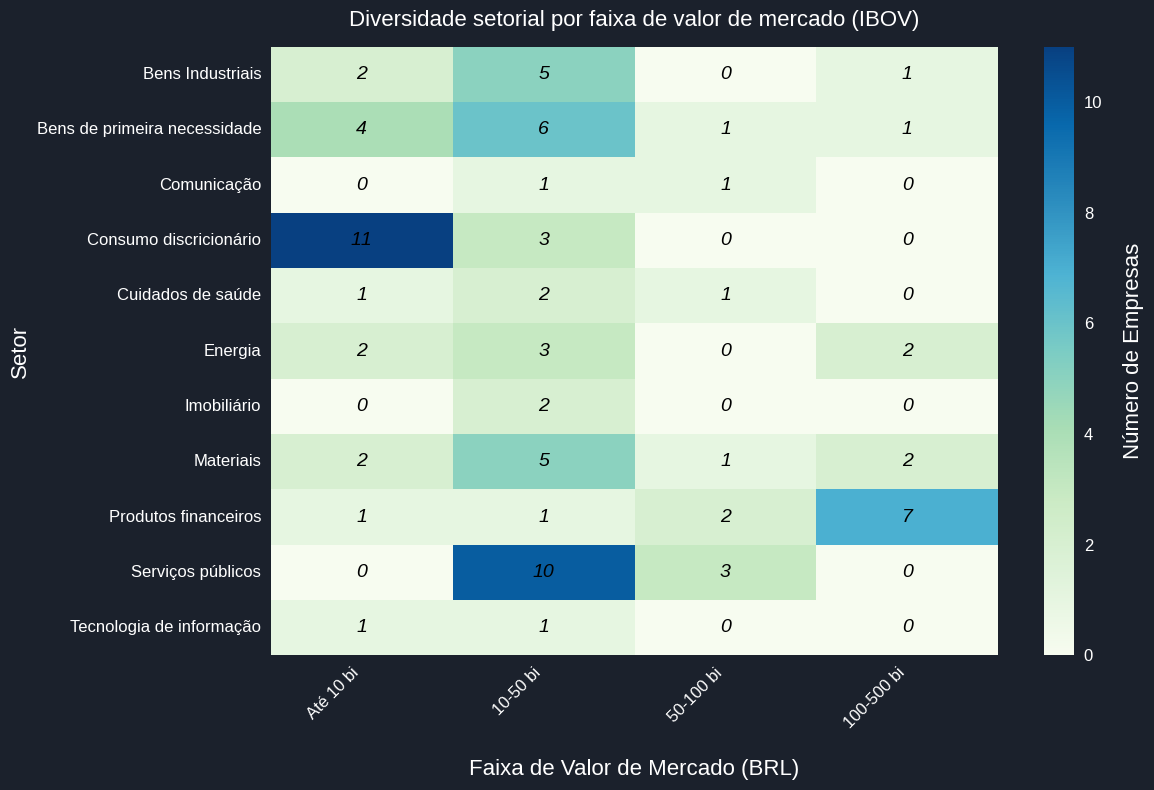

In [77]:
from matplotlib.colors import ListedColormap
nome_png = 'heatmap_bvsp.png'

# Definição da taxa de câmbio em 18/10/2024 (1 BRL -> 5,695 USD)
taxa_cambio = 1.00
composicao_bvsp['Market Value BRL'] = composicao_bvsp['Market Value'] * taxa_cambio

paleta_personalizada = ["#0145ac", "#4679c6", "#008000", "#82c7a5"]
cores = ListedColormap(paleta_personalizada)

# Filtrando dados
composicao_bvsp = composicao_bvsp.dropna(subset=['Market Value'])

# Classificação das empresas em faixas de valor de mercado (em BRL)
faixas = [0, 10e9, 50e9, 100e9, 500e9, 1e12, 5e12, 10e12, 20e12, 30e12]
labels = ['Até 10 bi', '10-50 bi', '50-100 bi', '100-500 bi', '0.5-1.0 tri', '1.0-5.0 tri', '5.0-10 tri', '10-20 tri', '20-30 tri']
composicao_bvsp['Faixa de Valor de Mercado'] = pd.cut(composicao_bvsp['Market Value BRL'], bins=faixas, labels=labels)

# Criação de table para o heatmap
heatmap_data = pd.crosstab(composicao_bvsp['Sector'], composicao_bvsp['Faixa de Valor de Mercado'])

# Plot do heatmap
plt.figure(figsize=(12, 8), facecolor = '#1b212cff' )
ax = sns.heatmap(
    heatmap_data,
    annot=True,
    cmap="GnBu",
    fmt="d",
    cbar_kws={'label': 'Número de Empresas'},  # Aqui editar customizações do colorbar
    annot_kws={"size": 14, "fontstyle": "italic", "color": "black"}
)

# Mais edições do colobar
cbar = ax.collections[0].colorbar
cbar.set_label('Número de Empresas', fontsize=16, labelpad=15)
cbar.ax.tick_params(labelsize=12)

plt.title("Diversidade setorial por faixa de valor de mercado (IBOV)", fontsize=16, pad=15, loc='center')
plt.xlabel("Faixa de Valor de Mercado (BRL)", fontsize=16, labelpad=20)
plt.ylabel("Setor", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)


plt.tight_layout()
plt.savefig(nome_png, dpi=300, facecolor='#1b212cff')

# Baixar o arquivo salvo
#files.download(nome_png)


## Boxplot dos índices e seus ativos

Abaixo são apresentados os boxplots dos índices **S&P 100** e **IBOV**, assim como os cinco melhores e piores ativos de cada índice. 

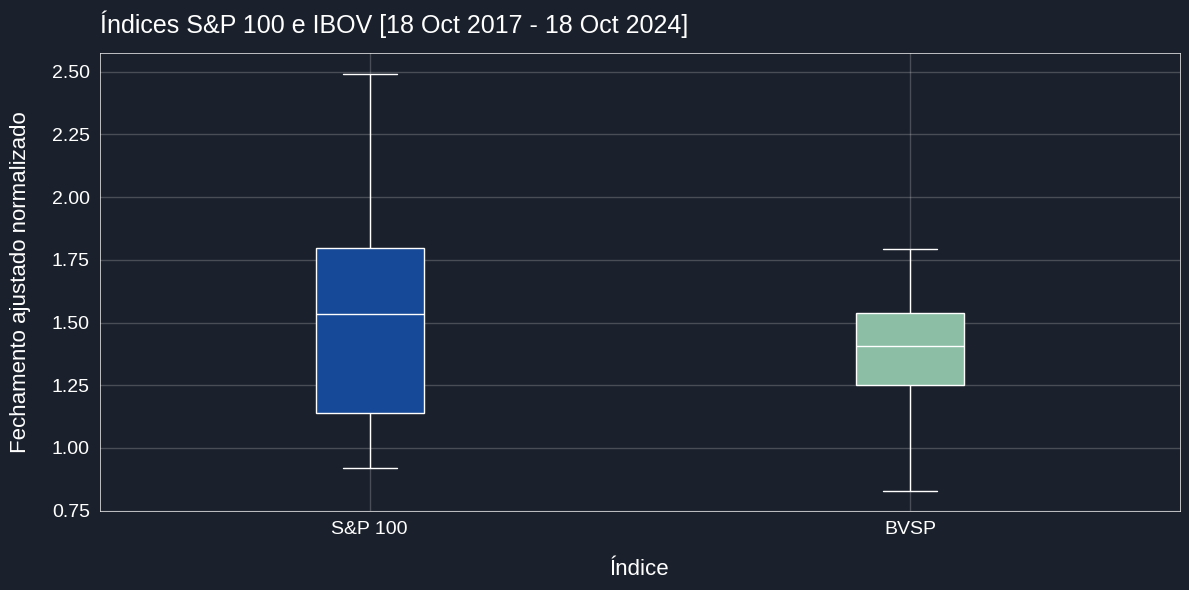

In [94]:
nome_png = 'bvsp_sp100_boxplot.png'

# Definindo intervalo de datas
date_start = pd.Timestamp('2017-10-18')
date_end = pd.Timestamp('2024-10-18')

# Filtrando os dados do índice S&P 100 no intervalo de datas
df_sp100 = sp100_dados[(sp100_dados.index >= date_start) & (sp100_dados.index <= date_end)]
df_sp100['Adj Close'] = pd.to_numeric(df_sp100['Adj Close'], errors='coerce')
df_sp100['Adj Close Normalizado'] = df_sp100['Adj Close'] / df_sp100['Adj Close'].iloc[0]

# Filtrando os dados do índice BVSP no intervalo de datas
df_bvsp = bvsp_dados[(bvsp_dados.index >= date_start) & (bvsp_dados.index <= date_end)]
df_bvsp['Adj Close'] = pd.to_numeric(df_bvsp['Adj Close'], errors='coerce')
df_bvsp['Adj Close Normalizado'] = df_bvsp['Adj Close'] / df_bvsp['Adj Close'].iloc[0]

# Adição de coluna de identificação para os dados
df_sp100['Índice'] = 'S&P 100'
df_bvsp['Índice'] = 'BVSP'

# Combinando os dados em um único DataFrame
df_combinado = pd.concat([df_sp100, df_bvsp])

# Configuração do estilo do gráfico
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6), facecolor = '#1b212cff')

# Customização dos outliers
outlier_props = dict(marker='x', color='red', markersize=5)

# Plot
sns.boxplot(x='Índice', y='Adj Close Normalizado', data=df_combinado, ax=ax,
            flierprops=outlier_props, hue='Índice', palette=['#0145ac', '#82c7a5'], linewidth=1, width=0.2, legend=False, linecolor='white')
ax.set_title(f'Índices S&P 100 e IBOV [{date_start.strftime("%d %b %Y")} - {date_end.strftime("%d %b %Y")}]', fontsize=18, loc='left', pad=15, color = 'w')
ax.set_ylabel('Fechamento ajustado normalizado', fontsize=16, labelpad=15, color = 'w')
ax.set_xlabel('Índice', fontsize=16, labelpad=15, color = 'w')
ax.tick_params(axis='both', which='major', labelsize=14, color = 'w')
ax.set_facecolor('#1b212cff')
ax.grid(alpha = 0.2)


# Adicionando borda ao redor do gráfico
for spine in ax.spines.values():
    spine.set_visible(True)  # Ativar todas as bordas
    spine.set_edgecolor('white')  # Definir a cor da borda
    spine.set_linewidth(0.5)  # Definir a largura da borda

# Ajuste do layout
plt.tight_layout()

# Salva e exibe a figura
plt.savefig(nome_png, dpi=300)
plt.show()

# Baixar o arquivo salvo
#files.download(nome_png)

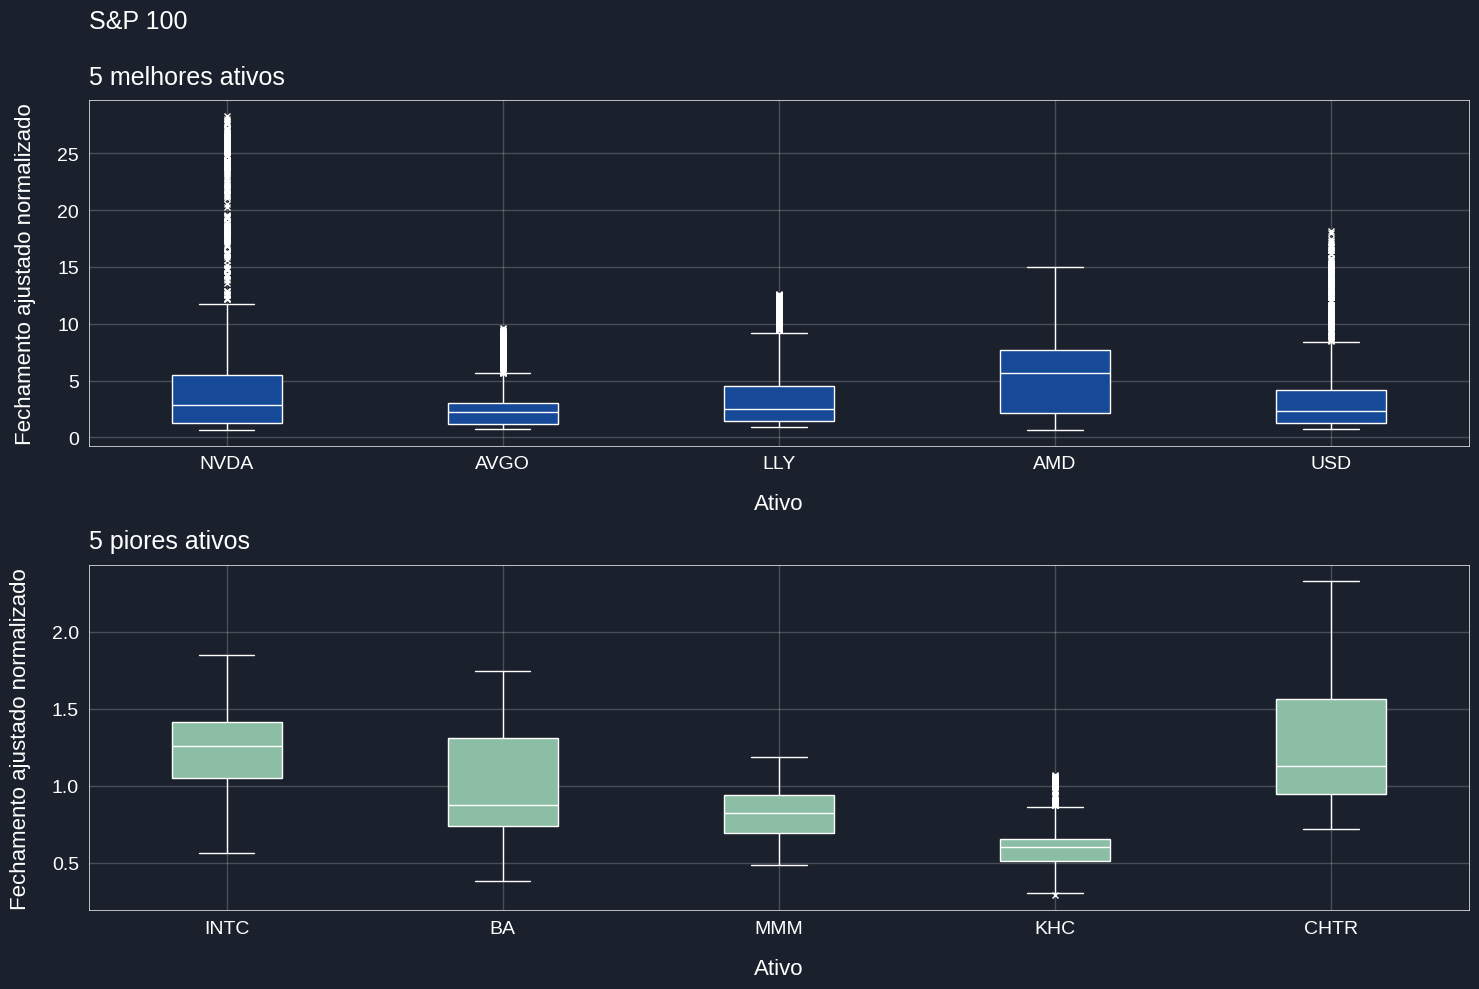

In [100]:
nome_png = 'sp100_tops_bottoms_boxplot.png'

# Definindo intervalo de datas
date_start = pd.Timestamp('2017-10-18')
date_end = pd.Timestamp('2024-10-18')

# Garantir que as colunas 'Date' e 'Adj Close' estejam no formato adequado
sp100_ativos_historical = sp100_ativos_historical.copy()
sp100_ativos_historical['Date'] = pd.to_datetime(sp100_ativos_historical['Date'])
sp100_ativos_historical['Adj Close'] = pd.to_numeric(sp100_ativos_historical['Adj Close'], errors='coerce')

# Filtrando os dados dos ativos do índice no intervalo de datas
ativos_historical_filtrado = sp100_ativos_historical[(sp100_ativos_historical['Date'] >= date_start) & (sp100_ativos_historical['Date'] <= date_end)]
ativos_historical_filtrado['Adj Close Normalizado'] = ativos_historical_filtrado.groupby('Symbol')['Adj Close'].transform(lambda x: x / x.iloc[0])

# Calcular o retorno acumulado final para cada ativo e selecionar os 5 melhores e piores
ativos_finais = ativos_historical_filtrado.groupby('Symbol')['Adj Close Normalizado'].last().sort_values()
melhores_ativos = ativos_finais.tail(5).index
piores_ativos = ativos_finais.head(5).index

# Configuração o estilo do gráfico
plt.style.use('dark_background')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10), facecolor = '#1b212cff')

# Customização dos outliers e contornos
outlier_props = dict(marker='x', color='w', markersize=5)
box_props = dict(edgecolor='w', linewidth=1.0)

# Plot 1. 5 melhores ativos do índice
sns.boxplot(
    y='Adj Close Normalizado', x='Symbol',
    data=ativos_historical_filtrado[ativos_historical_filtrado['Symbol'].isin(melhores_ativos)], ax=ax1,
    flierprops=outlier_props, linewidth=1, width=0.4, color='#0145ac', boxprops=box_props, linecolor='w'
)
ax1.set_title('S&P 100 \n\n5 melhores ativos', fontsize=18, loc='left', pad=12)
ax1.set_ylabel('Fechamento ajustado normalizado', fontsize=16, labelpad=15)
ax1.set_xlabel('Ativo', fontsize=16, labelpad=15)
ax1.tick_params(axis='both', which='major', labelsize=14)
ax1.set_facecolor('#1b212cff')
ax1.grid(alpha = 0.2)


# Adicionando borda ao redor do gráfico
for spine in ax1.spines.values():
    spine.set_visible(True)  # Ativar todas as bordas
    spine.set_edgecolor('white')  # Definir a cor da borda
    spine.set_linewidth(0.5)  # Definir a largura da borda

# Plot 2.  5 piores ativos do índice
sns.boxplot(
    y='Adj Close Normalizado', x='Symbol',
    data=ativos_historical_filtrado[ativos_historical_filtrado['Symbol'].isin(piores_ativos)], ax=ax2,
    flierprops=outlier_props, linewidth=1, width=0.4, color='#82c7a5', boxprops=box_props, linecolor='w'
)
ax2.set_title('5 piores ativos', fontsize=18, loc='left', pad=12)
ax2.set_ylabel('Fechamento ajustado normalizado', fontsize=16, labelpad=15)
ax2.set_xlabel('Ativo', fontsize=16, labelpad=15)
ax2.tick_params(axis='both', which='major', labelsize=14)
ax2.set_facecolor('#1b212cff')
ax2.grid(alpha = 0.2)

# Adicionando borda ao redor do gráfico
for spine in ax2.spines.values():
    spine.set_visible(True)  # Ativar todas as bordas
    spine.set_edgecolor('white')  # Definir a cor da borda
    spine.set_linewidth(0.5)  # Definir a largura da borda

# Ajustar layout
plt.tight_layout()

# Salvar e exibir a figura
plt.savefig(nome_png, dpi=300, facecolor='#1b212cff')
plt.show()

# Baixar o arquivo salvo
#files.download(nome_png)


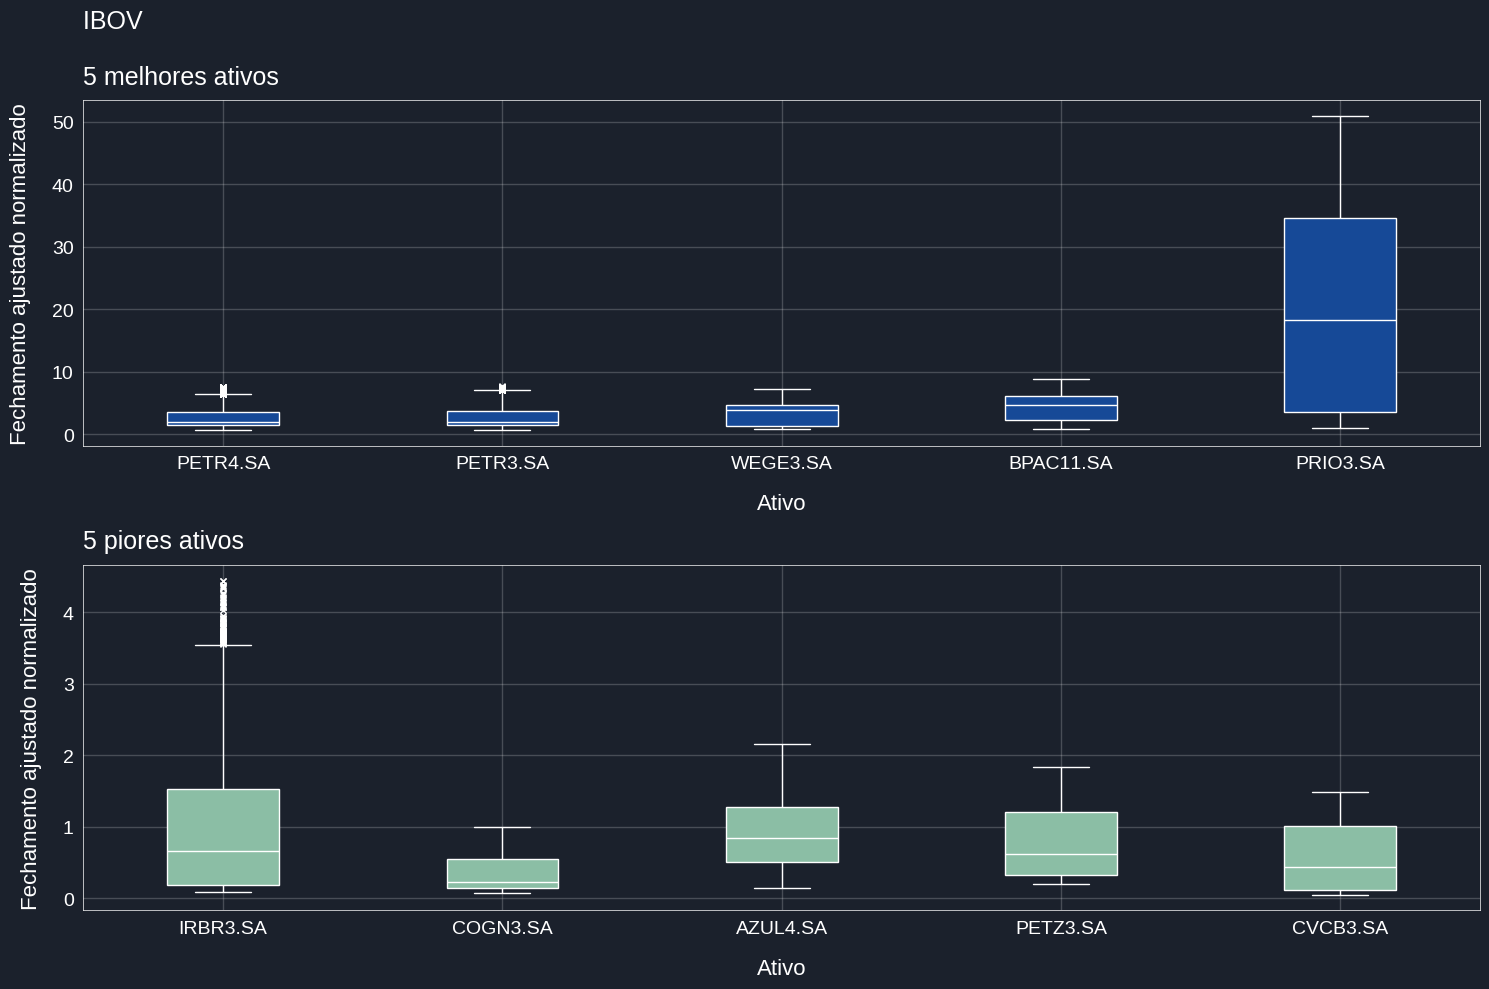

In [99]:
nome_png = 'bvsp_tops_bottoms_boxplot.png'

# Definindo intervalo de datas
date_start = pd.Timestamp('2017-10-18')
date_end = pd.Timestamp('2024-10-18')

# Garantir que as colunas 'Date' e 'Adj Close' estejam no formato adequado
bvsp_ativos_historical = bvsp_ativos_historical.copy()
bvsp_ativos_historical['Date'] = pd.to_datetime(bvsp_ativos_historical['Date'])
bvsp_ativos_historical['Adj Close'] = pd.to_numeric(bvsp_ativos_historical['Adj Close'], errors='coerce')

# Filtrando os dados dos ativos do índice no intervalo de datas
ativos_historical_filtrado = bvsp_ativos_historical[(bvsp_ativos_historical['Date'] >= date_start) & (bvsp_ativos_historical['Date'] <= date_end)]
ativos_historical_filtrado['Adj Close Normalizado'] = ativos_historical_filtrado.groupby('Symbol')['Adj Close'].transform(lambda x: x / x.iloc[0])

# Calcular o retorno acumulado final para cada ativo e selecionar os 5 melhores e piores
ativos_finais = ativos_historical_filtrado.groupby('Symbol')['Adj Close Normalizado'].last().sort_values()
melhores_ativos = ativos_finais.tail(5).index
piores_ativos = ativos_finais.head(5).index

# Configuração o estilo do gráfico
plt.style.use('dark_background')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10), facecolor = '#1b212cff')

# Customização dos outliers e contornos
outlier_props = dict(marker='x', color='w', markersize=5)
box_props = dict(edgecolor='w', linewidth=1.0)

# Plot 1. 5 melhores ativos do índice
sns.boxplot(
    y='Adj Close Normalizado', x='Symbol',
    data=ativos_historical_filtrado[ativos_historical_filtrado['Symbol'].isin(melhores_ativos)], ax=ax1,
    flierprops=outlier_props, linewidth=1, width=0.4, color='#0145ac', boxprops=box_props, linecolor='w'
)
ax1.set_title('IBOV \n\n5 melhores ativos', fontsize=18, loc='left', pad=12)
ax1.set_ylabel('Fechamento ajustado normalizado', fontsize=16, labelpad=15)
ax1.set_xlabel('Ativo', fontsize=16, labelpad=15)
ax1.tick_params(axis='both', which='major', labelsize=14)
ax1.set_facecolor('#1b212cff')
ax1.grid(alpha = 0.2)


# Adicionando borda ao redor do gráfico
for spine in ax1.spines.values():
    spine.set_visible(True)  # Ativar todas as bordas
    spine.set_edgecolor('white')  # Definir a cor da borda
    spine.set_linewidth(0.5)  # Definir a largura da borda

# Plot 2.  5 piores ativos do índice
sns.boxplot(
    y='Adj Close Normalizado', x='Symbol',
    data=ativos_historical_filtrado[ativos_historical_filtrado['Symbol'].isin(piores_ativos)], ax=ax2,
    flierprops=outlier_props, linewidth=1, width=0.4, color='#82c7a5', boxprops=box_props, linecolor='w'
)
ax2.set_title('5 piores ativos', fontsize=18, loc='left', pad=12)
ax2.set_ylabel('Fechamento ajustado normalizado', fontsize=16, labelpad=15)
ax2.set_xlabel('Ativo', fontsize=16, labelpad=15)
ax2.tick_params(axis='both', which='major', labelsize=14)
ax2.set_facecolor('#1b212cff')
ax2.grid(alpha = 0.2)

# Adicionando borda ao redor do gráfico
for spine in ax2.spines.values():
    spine.set_visible(True)  # Ativar todas as bordas
    spine.set_edgecolor('white')  # Definir a cor da borda
    spine.set_linewidth(0.5)  # Definir a largura da borda

# Ajustar layout
plt.tight_layout()

# Salvar e exibir a figura
plt.savefig(nome_png, dpi=300, facecolor='#1b212cff')
plt.show()

# Baixar o arquivo salvo
#files.download(nome_png)
